# Loan Data from Prosper
## by - Shaurya Sinha

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
> - This data dictionary explains the variables in the data set.
> - You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Exploring the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure ?

> 81 columns and 113937 rows

### What is/are the main feature(s) of interest in your dataset?

> the loan amounts and loan amount > 10000 the most convinient way to get it should have which factors.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Credit Score/grade , Prosper Score , borrower Rate , Occupation , etc

## What are the diffrent LoanStatus and what is the distribution of them ?

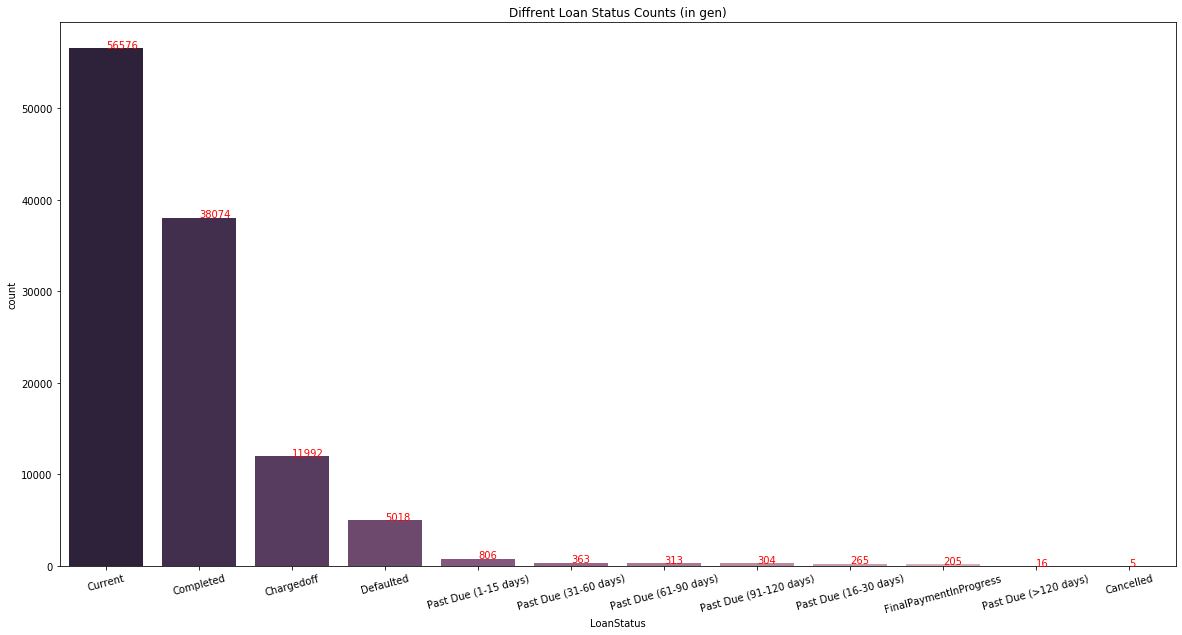

In [4]:
# A Count plot of Loan Status in genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(12  , reverse=True)
sns.countplot(x=df['LoanStatus'], ax=ax , order=df['LoanStatus'].value_counts().index , palette=cmap)
plt.xticks(rotation=15)
plt.title("Diffrent Loan Status Counts (in gen)")
for i, v in df['LoanStatus'].value_counts().reset_index().iterrows():
    ax.text(i, v.LoanStatus + 0.2 , v.LoanStatus, color='red')

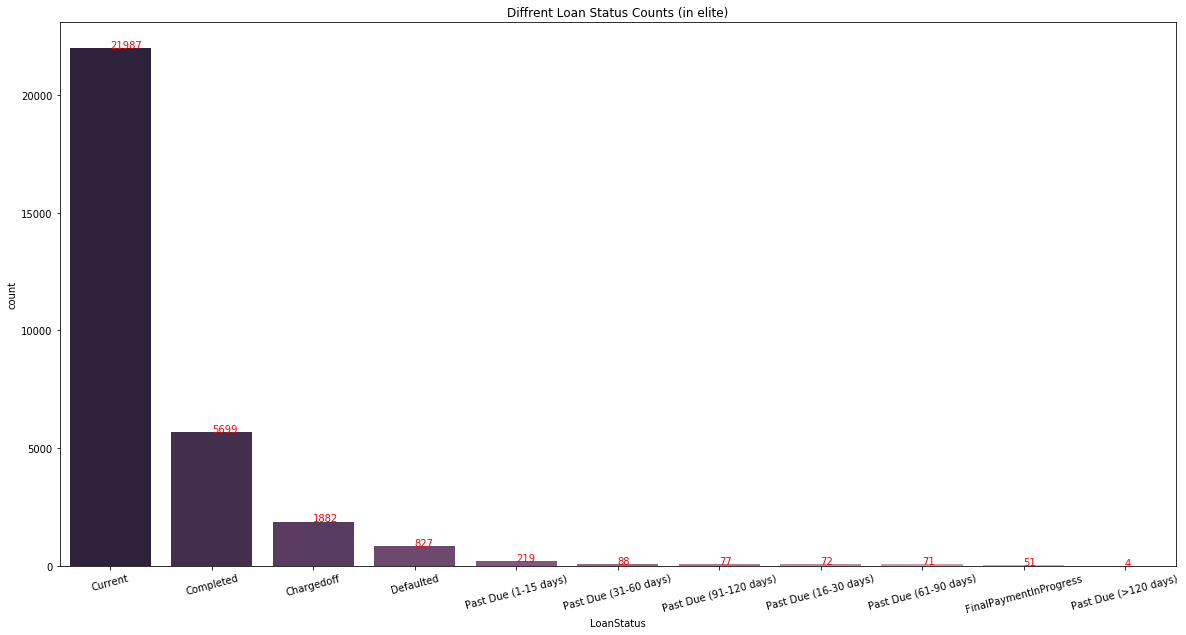

In [5]:
# A Count plot of Loan Status in elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(12  , reverse=True)
sns.countplot(x=df.query("LoanOriginalAmount > 10000")['LoanStatus'], ax=ax , order=df.query("LoanOriginalAmount > 10000")['LoanStatus'].value_counts().index , palette=cmap)
plt.xticks(rotation=15)
plt.title("Diffrent Loan Status Counts (in elite)")
for i, v in df.query("LoanOriginalAmount > 10000")['LoanStatus'].value_counts().reset_index().iterrows():
    ax.text(i, v.LoanStatus + 0.2 , v.LoanStatus, color='red')

- Forr all the loans in genral Most of the people have completed their payment fo the loan however a significant proportion still is defaulted or is past due by 1-120 days
- However in the case of Elite Loans(loans>10000) the completion rate is very low as compared to all the loans in genral

## Which Type/Category of loans are mostly given out ?

In [6]:
# Listing category numeric top 5 counts
df = df.rename(columns={"ListingCategory (numeric)":"ListingCategory"})
df['ListingCategory'].value_counts().head()

1    58308
0    16965
7    10494
2     7433
3     7189
Name: ListingCategory, dtype: int64

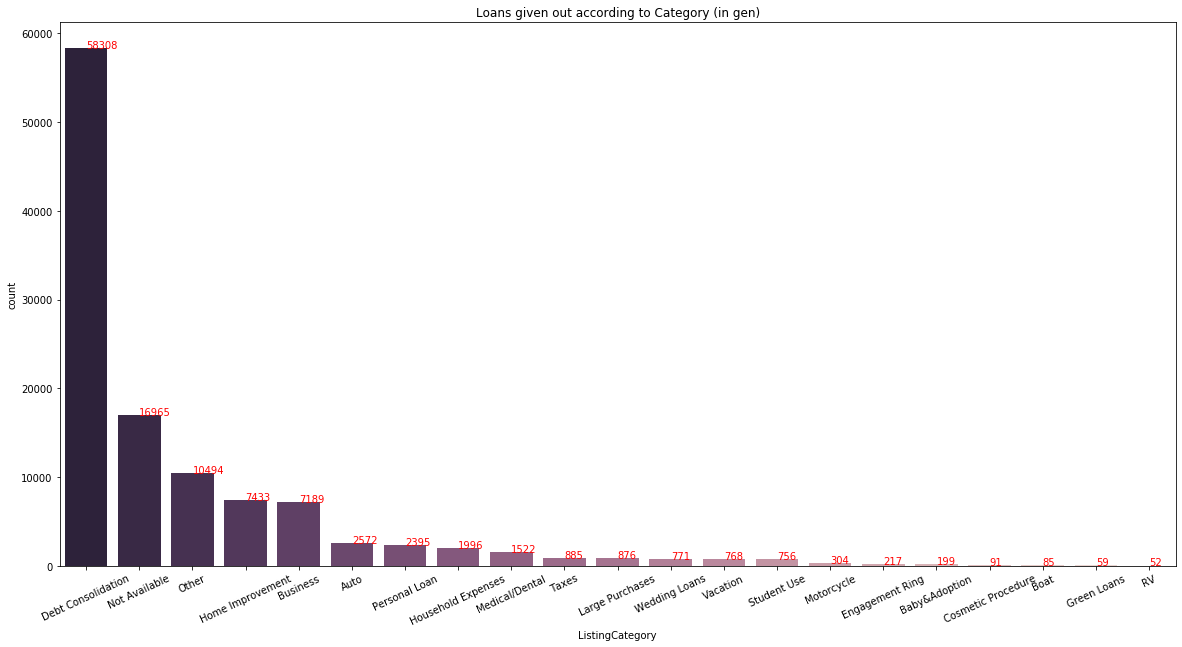

In [7]:
# A Count plot of Listing Category for genral loans
new = ["Not Available" , "Debt Consolidation", "Home Improvement" , "Business" , "Personal Loan" , "Student Use" , "Auto" , "Other" , "Baby&Adoption",
      "Boat" , "Cosmetic Procedure" , "Engagement Ring" , "Green Loans" , "Household Expenses" , "Large Purchases" , "Medical/Dental" , "Motorcycle" ,
      "RV" , "Taxes" , "Vacation" , "Wedding Loans"]
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(20 , reverse=True)
sns.countplot(x=df['ListingCategory'], ax=ax , order=df['ListingCategory'].value_counts().index , palette=cmap)
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(21):
    labels[i] = new[int(labels[i])]

ax.set_xticklabels(labels)
plt.xticks(rotation=25)
plt.title("Loans given out according to Category (in gen)")
for i, v in df['ListingCategory'].value_counts().reset_index().iterrows():
    ax.text(i, v.ListingCategory + 0.2 , v.ListingCategory, color='red');

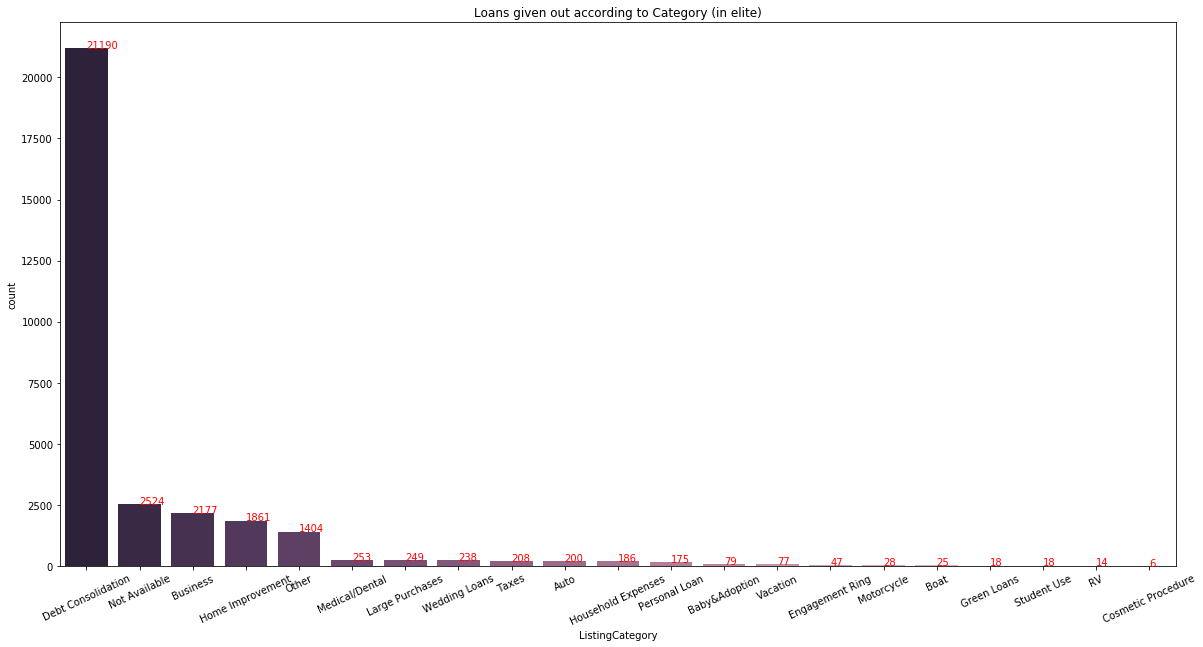

In [8]:
# A Count plot of Listing Category for Elite Loans
new = ["Not Available" , "Debt Consolidation", "Home Improvement" , "Business" , "Personal Loan" , "Student Use" , "Auto" , "Other" , "Baby&Adoption",
      "Boat" , "Cosmetic Procedure" , "Engagement Ring" , "Green Loans" , "Household Expenses" , "Large Purchases" , "Medical/Dental" , "Motorcycle" ,
      "RV" , "Taxes" , "Vacation" , "Wedding Loans"]
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(20 , reverse=True)
sns.countplot(x=df.query("LoanOriginalAmount > 10000")['ListingCategory'], ax=ax , order=df.query("LoanOriginalAmount > 10000")['ListingCategory'].value_counts().index , palette=cmap)
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(21):
    labels[i] = new[int(labels[i])]

ax.set_xticklabels(labels)
plt.xticks(rotation=25)
plt.title("Loans given out according to Category (in elite)")
for i, v in df.query("LoanOriginalAmount > 10000")['ListingCategory'].value_counts().reset_index().iterrows():
    ax.text(i, v.ListingCategory + 0.2 , v.ListingCategory, color='red');

- we see that most of the loans given out were to cover off other debts i.e. Debt Consolidation in both the cases Normal loans in. genal and Elite Loans(loan>10000)
- Least loans were given to boats , green Loans and RV in case of genral Loans
- While in case of Elite Loans the least no of loans were given to Student Use , Rv and Cosmetic Procedure

## Which occupation Takes most no of loans ?

In [9]:
# Diffrent Occupations available
df["Occupation"].value_counts().iloc[0:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

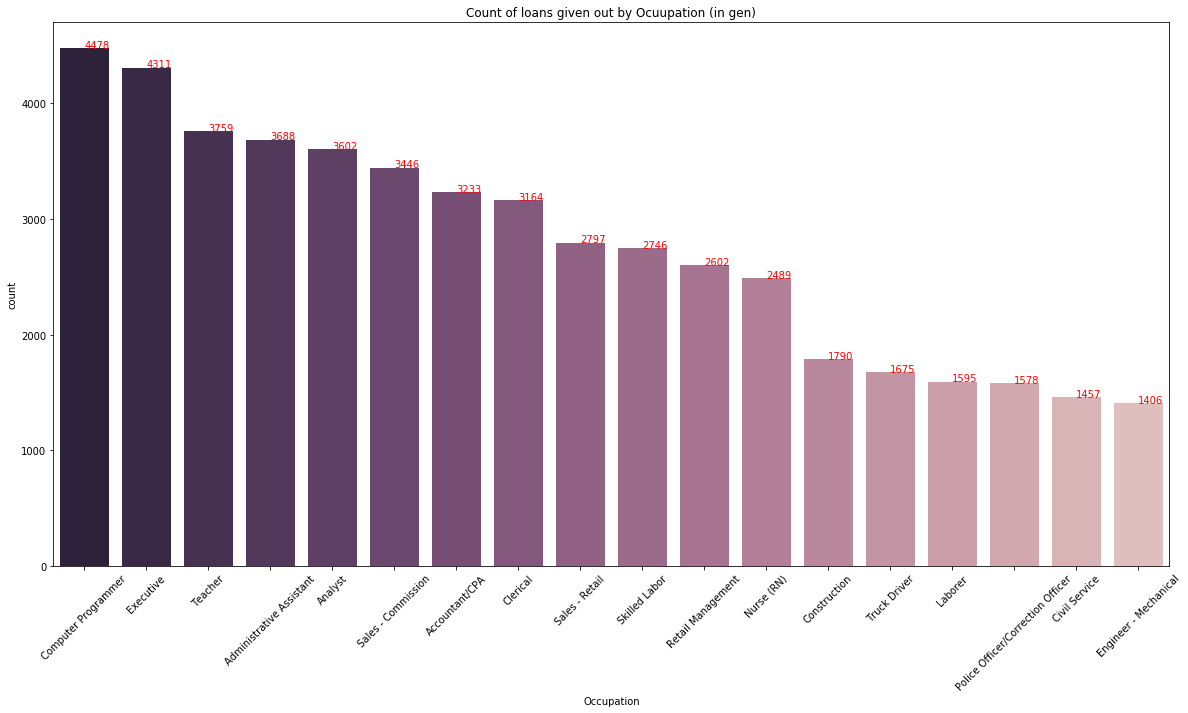

In [10]:
# A Count plot of Diffent occupations in genral
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(20  , reverse=True)
sns.countplot(x=df["Occupation"], ax=ax , order=df["Occupation"].value_counts().iloc[2:20].index , palette=cmap)
plt.xticks(rotation=45)
plt.title("Count of loans given out by Ocuupation (in gen)")
for i, v in df["Occupation"].value_counts().iloc[2:20].reset_index().iterrows():
    ax.text(i, v.Occupation + 0.2 , v.Occupation, color='red');

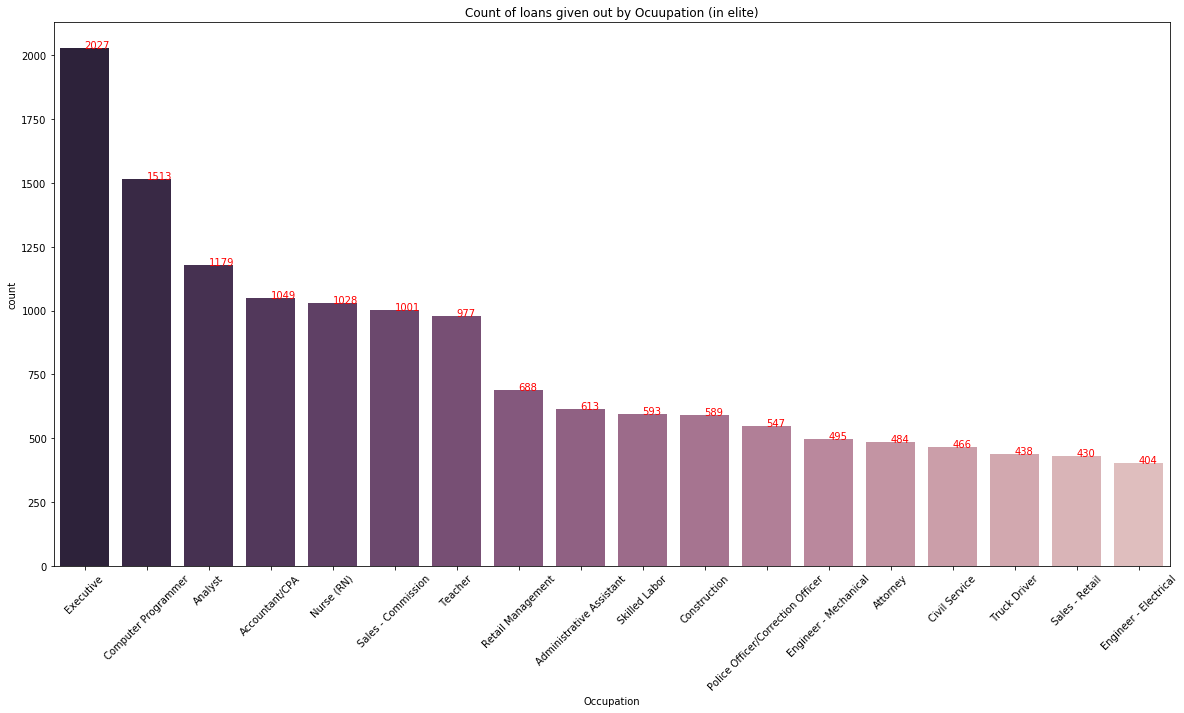

In [11]:
# A Count plot of Diffent occupations in elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(20  , reverse=True)
sns.countplot(x=df.query("LoanOriginalAmount > 10000")["Occupation"], ax=ax , order=df.query("LoanOriginalAmount > 10000")["Occupation"].value_counts().iloc[2:20].index , palette=cmap)
plt.xticks(rotation=45)
plt.title("Count of loans given out by Ocuupation (in elite)")
for i, v in df.query("LoanOriginalAmount > 10000")["Occupation"].value_counts().iloc[2:20].reset_index().iterrows():
    ax.text(i, v.Occupation + 0.2 , v.Occupation, color='red');

- On an Average most no of Loans were taken by Computer Programmers followed by Executive and then teacher 
- While in the case of Elite Loans (loans >10000) most loans were taken by Executive Followed by computer programmer and then analyst
- On an Average least no of Loans were taken by Police Officer , civil Servise ,  Engineer mechanical
- While in the case of Elite Loans (loans >10000) least loans were taken by truck driver , sales-retail , Engineer-Electrical

## Which Credit Grade Takes most no of loans ?

In [12]:
# diffent Credit Grades
df["CreditGrade"].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

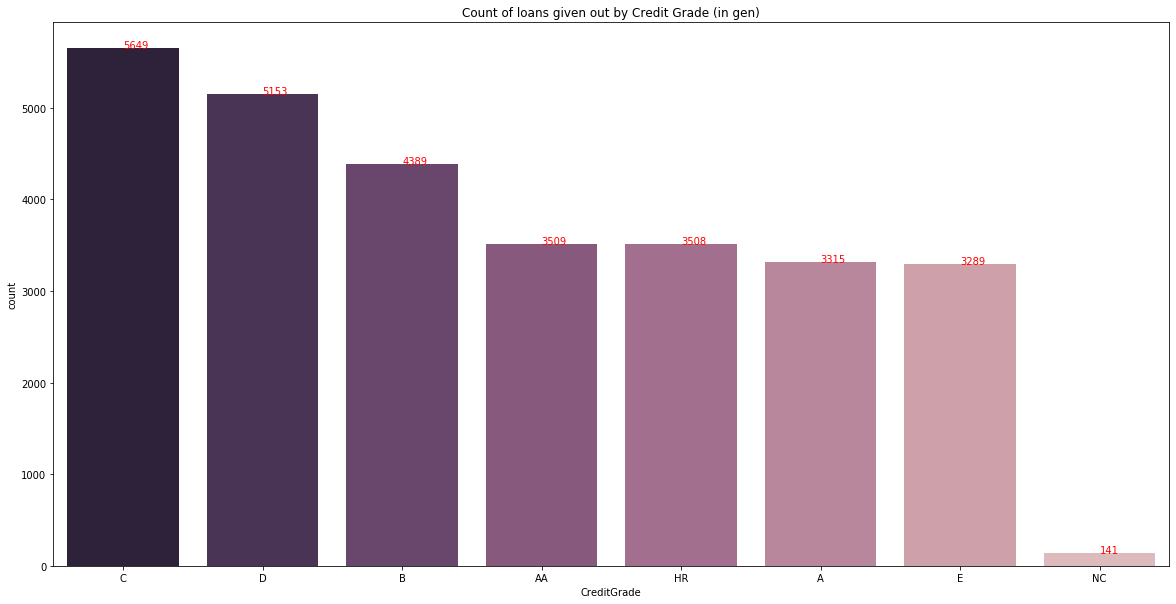

In [13]:
# A Count plot of Diffent Credit Grades in genral
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(9  , reverse=True)
sns.countplot(x=df["CreditGrade"], ax=ax , order=df["CreditGrade"].value_counts().index , palette=cmap)
plt.title("Count of loans given out by Credit Grade (in gen)")
for i, v in df["CreditGrade"].value_counts().reset_index().iterrows():
    ax.text(i, v.CreditGrade + 0.2 , v.CreditGrade, color='red');

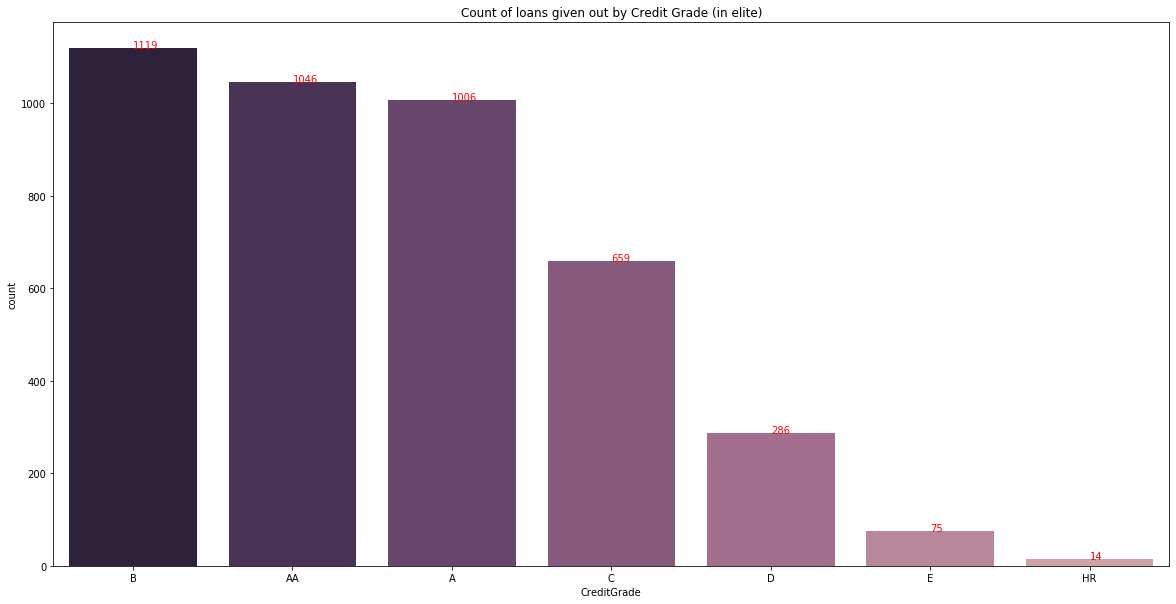

In [14]:
# A Count plot of Diffent Credit Grades in elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(9  , reverse=True)
sns.countplot(x=df.query("LoanOriginalAmount > 10000")["CreditGrade"], ax=ax , order=df.query("LoanOriginalAmount > 10000")["CreditGrade"].value_counts().index , palette=cmap)
plt.title("Count of loans given out by Credit Grade (in elite)")
for i, v in df.query("LoanOriginalAmount > 10000")["CreditGrade"].value_counts().reset_index().iterrows():
    ax.text(i, v.CreditGrade + 0.2 , v.CreditGrade, color='red');

- in case of all the loans taken into acount people with credit grade of **C , D , B** were gven more preference while people with credit grade of **NC** were less
- while in case of Elite loans(loans>10000) loans people with credit grade of **B , AA , A** were gven more preference while people with credit grade of **HR** were less

## Which Sector Takes most no of loans ?

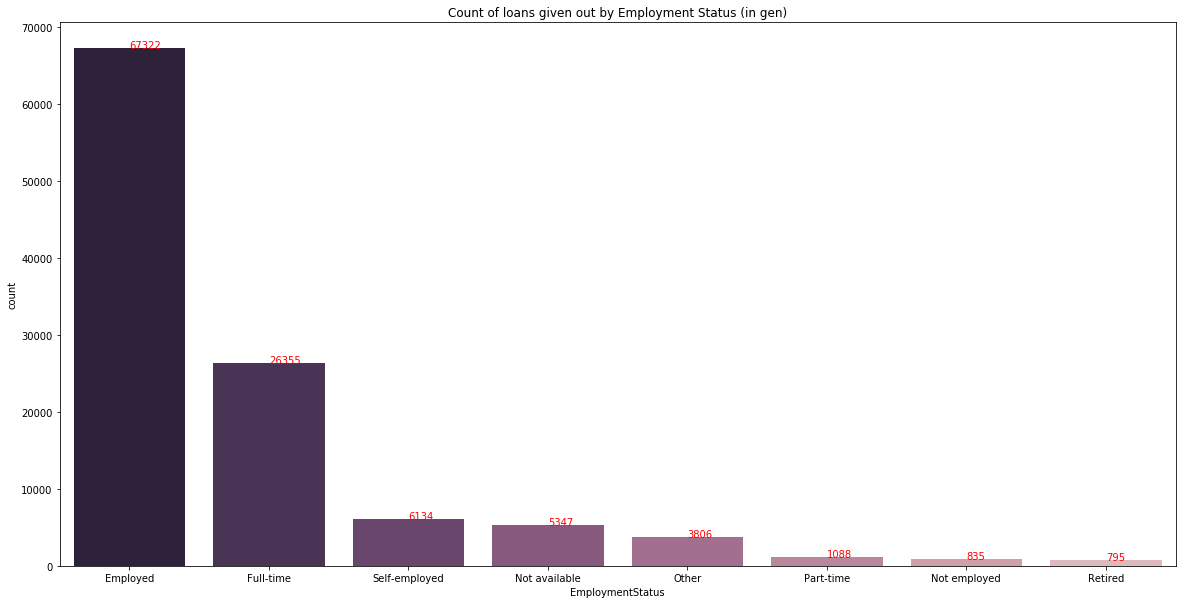

In [15]:
# A Count plot of Diffent Employment Status in genral
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(9  , reverse=True)
sns.countplot(x=df["EmploymentStatus"], ax=ax , order=df["EmploymentStatus"].value_counts().index , palette=cmap)
plt.title("Count of loans given out by Employment Status (in gen)")
for i, v in df["EmploymentStatus"].value_counts().reset_index().iterrows():
    ax.text(i, v.EmploymentStatus + 0.2 , v.EmploymentStatus, color='red');

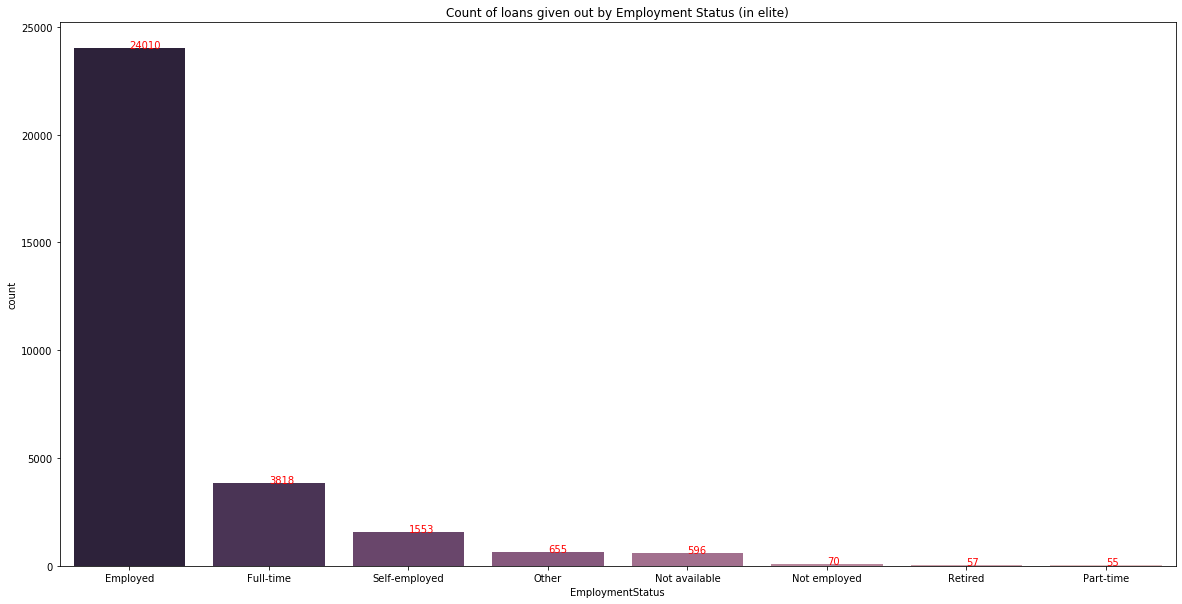

In [16]:
# A Count plot of Diffent Employment Status in elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(9  , reverse=True)
sns.countplot(x=df.query("LoanOriginalAmount > 10000")["EmploymentStatus"], ax=ax , order=df.query("LoanOriginalAmount > 10000")["EmploymentStatus"].value_counts().index , palette=cmap)
plt.title("Count of loans given out by Employment Status (in elite)")
for i, v in df.query("LoanOriginalAmount > 10000")["EmploymentStatus"].value_counts().reset_index().iterrows():
    ax.text(i, v.EmploymentStatus + 0.2 , v.EmploymentStatus, color='red');

- People who were **employed** were given more preference both in normal and Elite loans(loans>10000) while they also are the once to ask for loans the most

## Count of people who recieved loan of diffrent amounts.

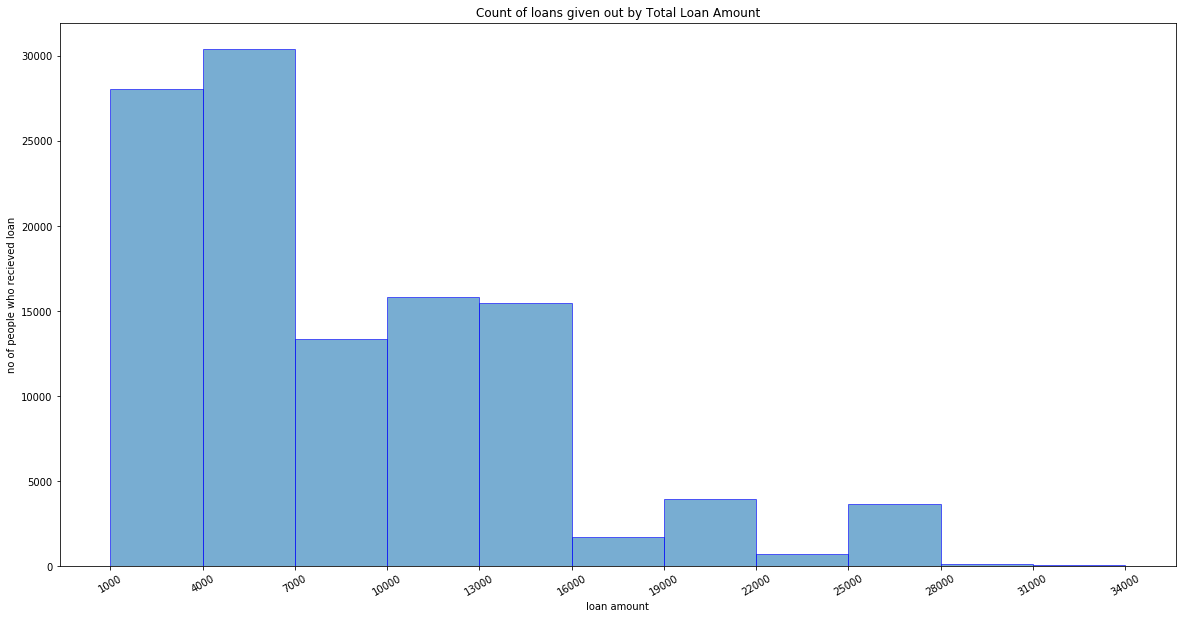

In [17]:
# ahistogram depecting the relationship between diffrent ranges of loan amount and no of people who recieved it
fig, ax = plt.subplots(figsize=(20 , 10))
bins = np.arange(1000 , df['LoanOriginalAmount'].max()+1000 , 3000)
plt.hist(df['LoanOriginalAmount'] ,bins=bins , ec='blue' , alpha=0.6)
plt.xticks(bins , rotation=30)
plt.xlabel("loan amount")
plt.ylabel("no of people who recieved loan")
plt.title("Count of loans given out by Total Loan Amount");

- the histogram is left skewed which tells us that most of the loans issued was between 1000-7000 range

## Count of people with diffrent Prosper Score

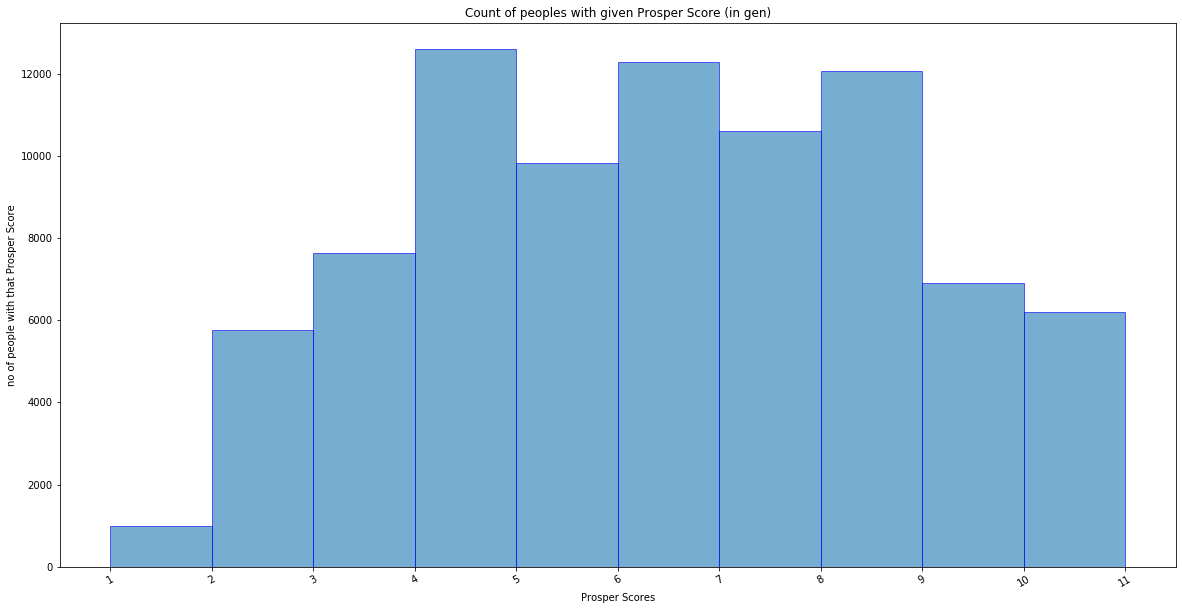

In [18]:
# a histogram depicting the relationship between the ranges of prosper Scores and no of people having prosper
# score between that prosper score in genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
bins = np.arange(df['ProsperScore'].min() , df['ProsperScore'].max()+1 , 1)
plt.hist(df['ProsperScore'] ,bins=bins , ec='blue' , alpha=0.6)
plt.xticks(bins , rotation=30)
plt.xlabel("Prosper Scores")
plt.ylabel("no of people with that Prosper Score")
plt.title("Count of peoples with given Prosper Score (in gen)");

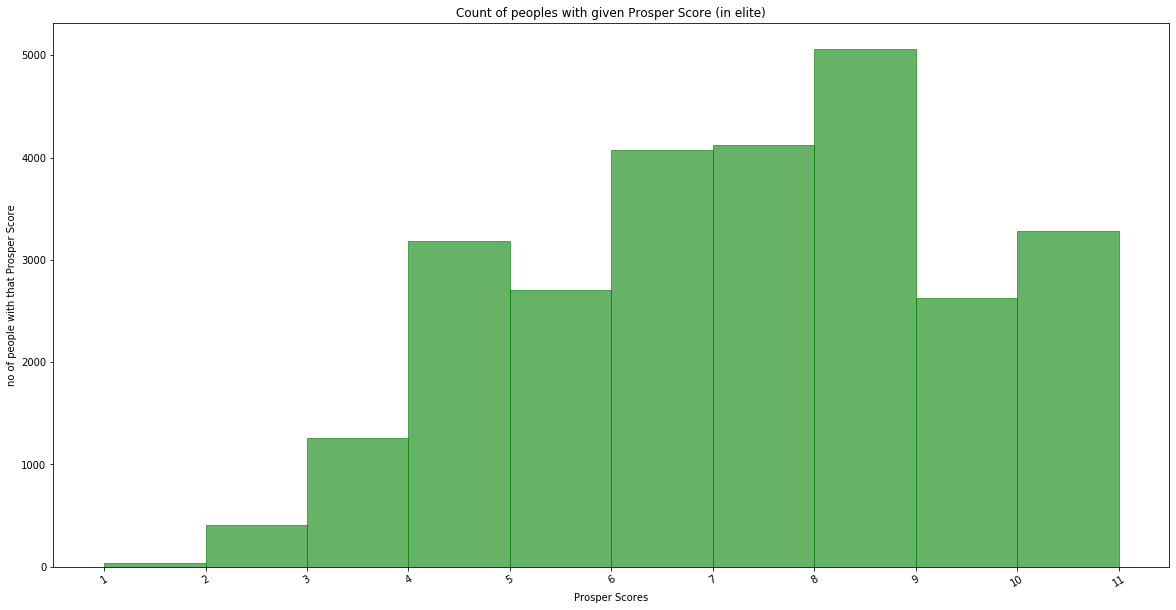

In [19]:
# a histogram depicting the relationship between the ranges of prosper Scores and no of people having prosper
# score between that prosper score in elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
bins = np.arange(df.query("LoanOriginalAmount > 10000")['ProsperScore'].min() , df.query("LoanOriginalAmount > 10000")['ProsperScore'].max()+1 , 1)
plt.hist(df.query("LoanOriginalAmount > 10000")['ProsperScore'] ,bins=bins , ec='green' ,color = 'green' , alpha=0.6)
plt.xticks(bins , rotation=30)
plt.xlabel("Prosper Scores")
plt.ylabel("no of people with that Prosper Score")
plt.title("Count of peoples with given Prosper Score (in elite)");

- We see that most of the people considering all the loans have their Prosper Score between 4-9
- while those who recieved Elite Loans(loan>10000) has their Prosper Score between 6-9

## Relationship between BorrowerAPR BorrowerRate

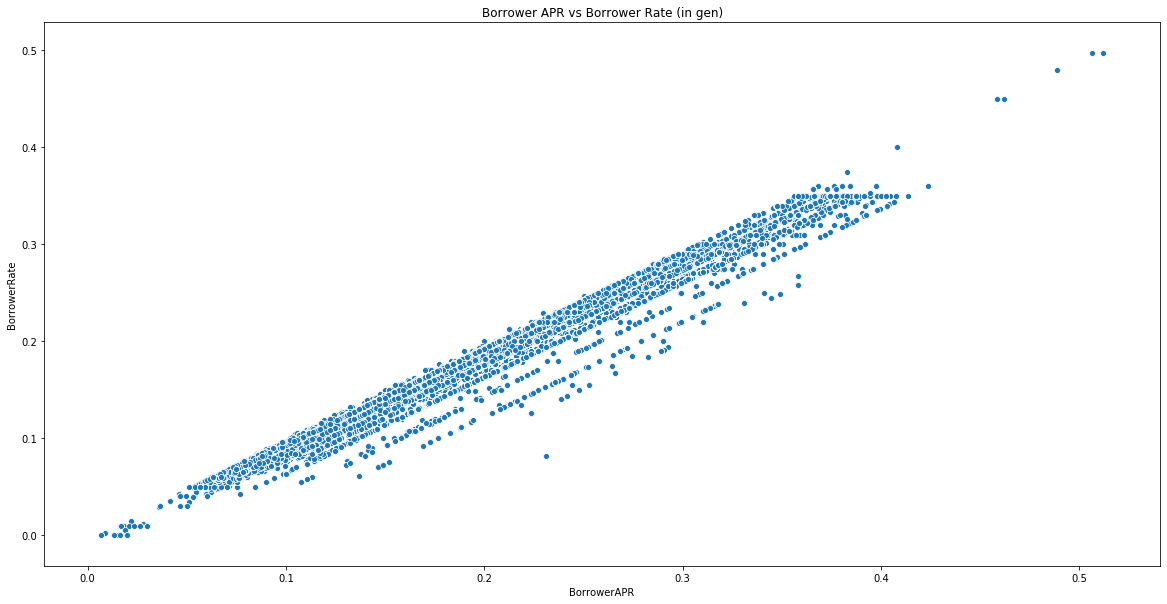

In [20]:
# A scatterplot depicting a relationship between BorrowerAPR and BorrowerRate in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.scatterplot(data=df , x="BorrowerAPR" , y="BorrowerRate")
plt.title("Borrower APR vs Borrower Rate (in gen)");

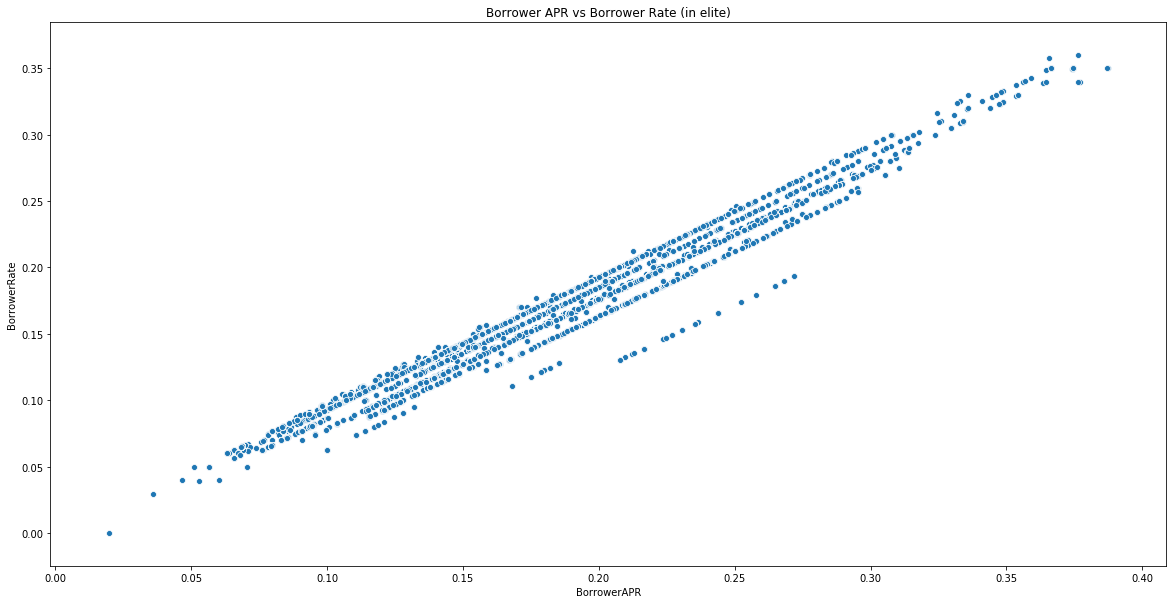

In [21]:
# A scatterplot depicting a relationship between BorrowerAPR and BorrowerRate in case of elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.scatterplot(data=df.query("LoanOriginalAmount > 10000") , x="BorrowerAPR" , y="BorrowerRate")
plt.title("Borrower APR vs Borrower Rate (in elite)");

- from the above visualizations we get to know that BorrowerAPR BorrowerRate are linearly related

## Relationship between Term and BorrowerRate

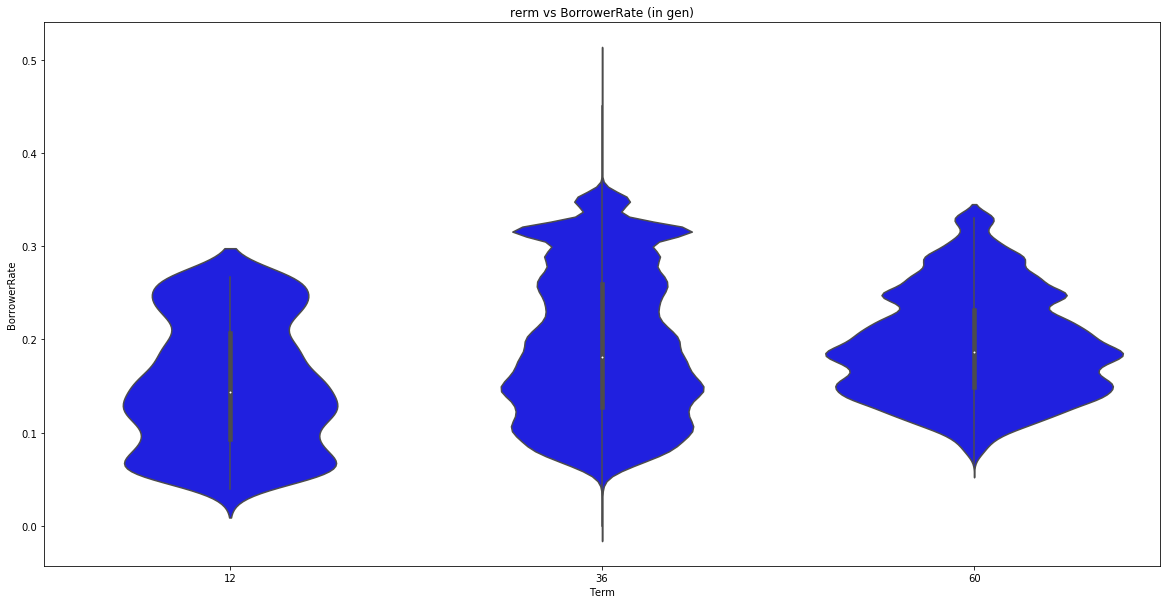

In [22]:
# A violinplot depicting a relationship between Term and BorrowerRate in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.violinplot(data=df , x="Term" , y="BorrowerRate" , color='blue' );
plt.title("rerm vs BorrowerRate (in gen)");

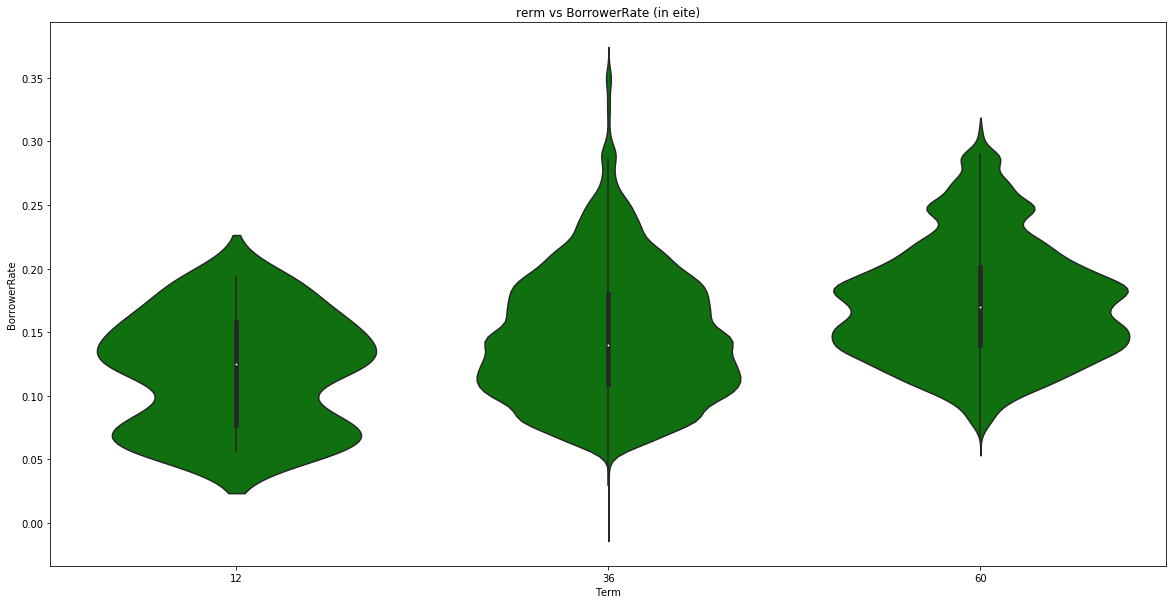

In [23]:
# A violinplot depicting a relationship between Term and BorrowerRate in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.violinplot(data=df.query("LoanOriginalAmount > 10000") , x="Term" , y="BorrowerRate" , color='green' );
plt.title("rerm vs BorrowerRate (in eite)");

- In the case of normal ie all the loans in genral 36 monts term has usally the highest borrow rate 
- While in the case of elite loans(loan>10000) 60 months term had usually the highest borrow rate
- we can see that with the increase of term usually the borrow rate can be expected to rise

## Does being unemployed affect to get a larger loan

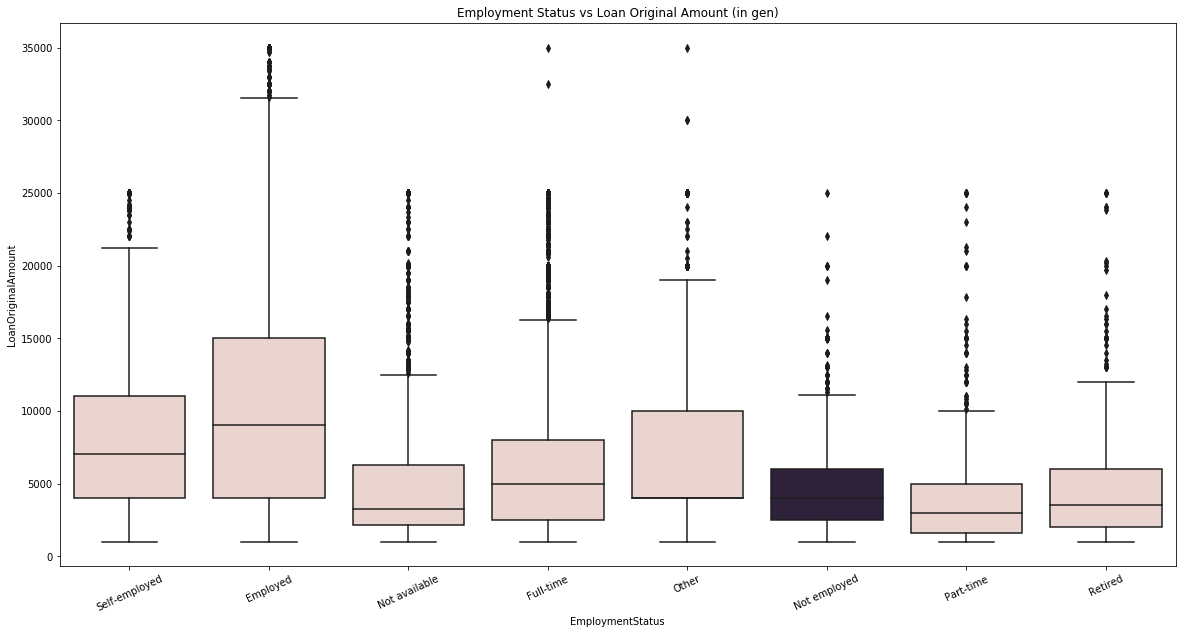

In [24]:
# A boxplot depicting a relationship between EmploymentStatus and LoanOriginalAmount in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = [[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.1750865648952205, 0.11840023306916837, 0.24215989137836502],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],]
sns.boxplot(data=df , x="EmploymentStatus" , y="LoanOriginalAmount" , palette=cmap)
plt.xticks(rotation=25)
plt.title("Employment Status vs Loan Original Amount (in gen)");

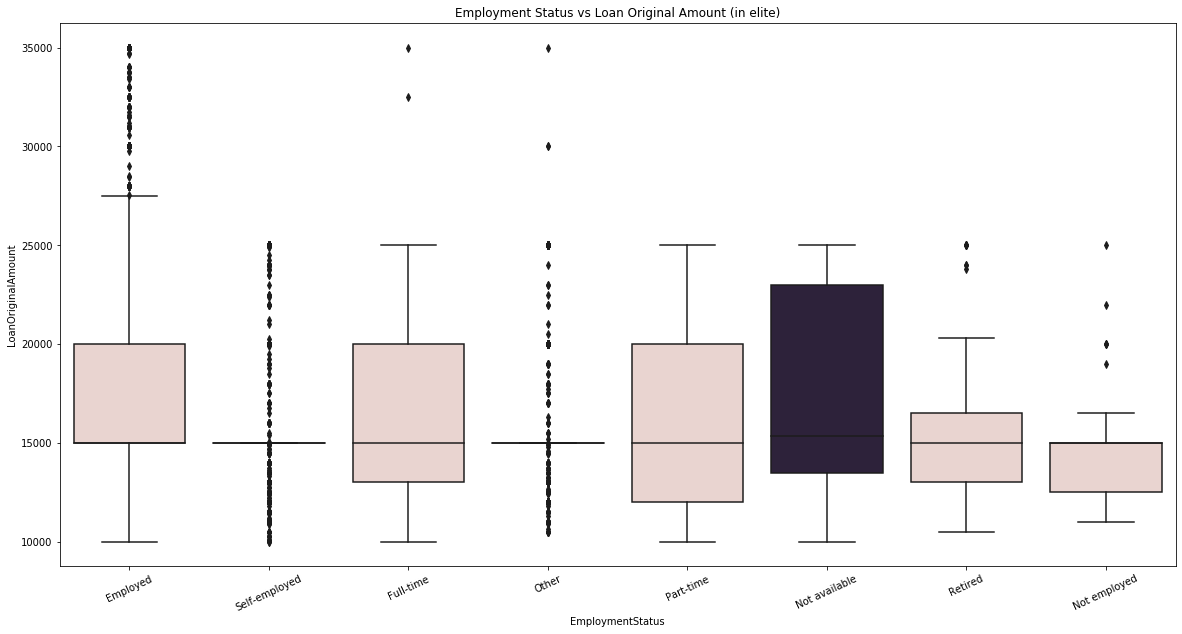

In [25]:
# A boxplot depicting a relationship between EmploymentStatus and LoanOriginalAmount in case of elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = [[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.1750865648952205, 0.11840023306916837, 0.24215989137836502],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
        [0.9312692223325372, 0.8201921796082118, 0.7971480974663592],]
sns.boxplot(data=df.query("LoanOriginalAmount > 10000") , x="EmploymentStatus" , y="LoanOriginalAmount" , palette=cmap)
plt.xticks(rotation=25)
plt.title("Employment Status vs Loan Original Amount (in elite)");

## Does having good Prosper Score improves my chances of getting higher loan Amounts

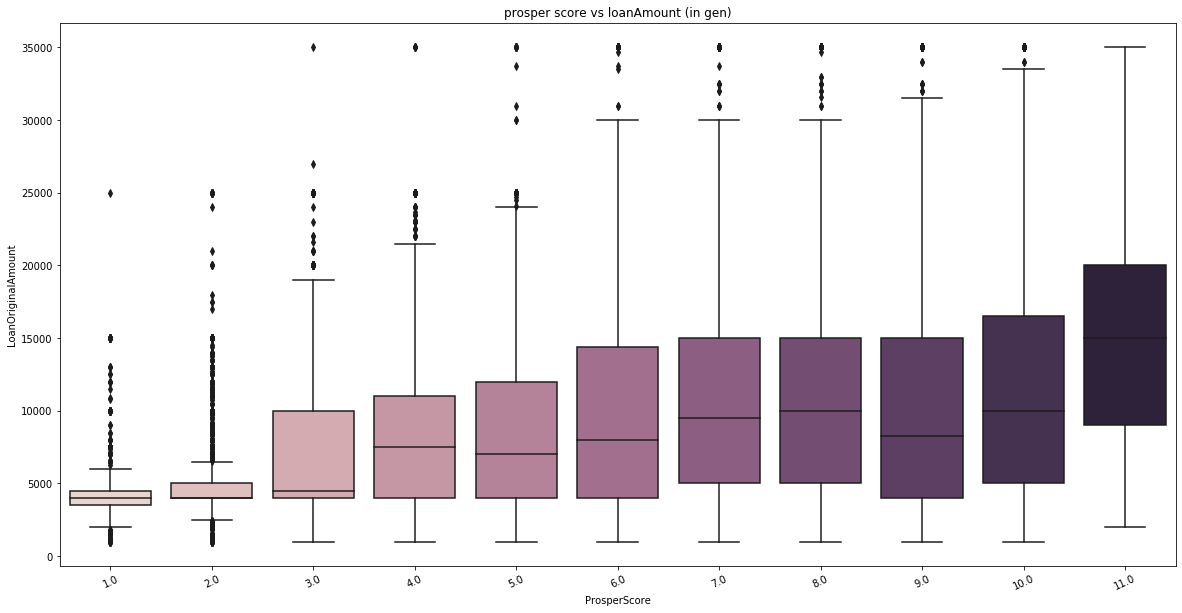

In [26]:
# A boxplot depicting a relationship between Prosper Score and LoanOriginalAmount in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(11 )
sns.boxplot(data=df , x="ProsperScore" , y="LoanOriginalAmount" , palette=cmap)
plt.xticks(rotation=25);
plt.title("prosper score vs loanAmount (in gen)");

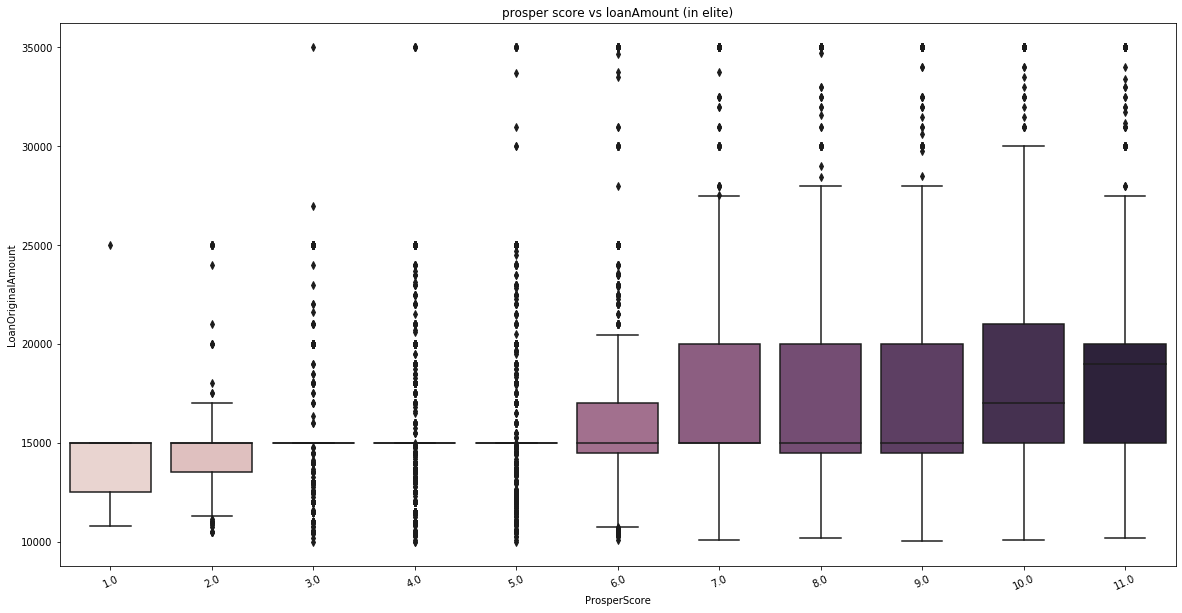

In [27]:
# A boxplot depicting a relationship between Prosper Score and LoanOriginalAmount in case of elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(11 )
sns.boxplot(data=df.query("LoanOriginalAmount > 10000") , x="ProsperScore" , y="LoanOriginalAmount" , palette=cmap)
plt.xticks(rotation=25);
plt.title("prosper score vs loanAmount (in elite)");

- From the above plots we can see that with the increse in prosper score loan amount also increased drastially

## Does having good Credit Score/Grade affects the chances of getting larger loan amounts

In [28]:
# merging the CreditScoreRangeLower CreditScoreRangeUpper columns into one CreditScoreAvg average of both
col = df.loc[: , "CreditScoreRangeLower":"CreditScoreRangeUpper"]
df["CreditScoreAvg"] = col.mean(axis=1)

In [29]:
# Creatinhg a new column new_emp that cotains only 2 variables employed or not
df['new_emp'] = df["EmploymentStatus"]

In [30]:
df['new_emp'] = df['new_emp'].replace({"Self-employed": "Employed", "Full-time": "Employed", "Part-time": "Employed", "Retired": "Not employed"})

In [31]:
df["new_emp"].unique()

array(['Employed', 'Not available', 'Other', nan, 'Not employed'],
      dtype=object)

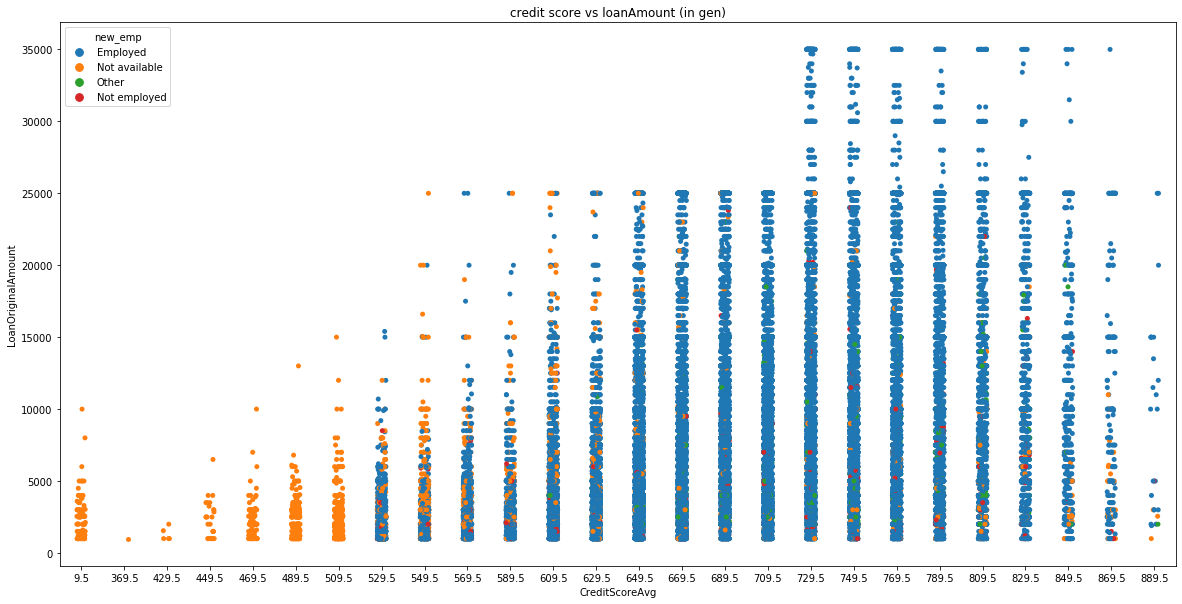

In [32]:
# a stripplot that depicts the relationship between CreditScoreAvg and LoanOriginalAmount with new_emp 
# as the third variable in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.stripplot(data=df , x="CreditScoreAvg" , y="LoanOriginalAmount" , hue = "new_emp");
plt.title("credit score vs loanAmount (in gen)");

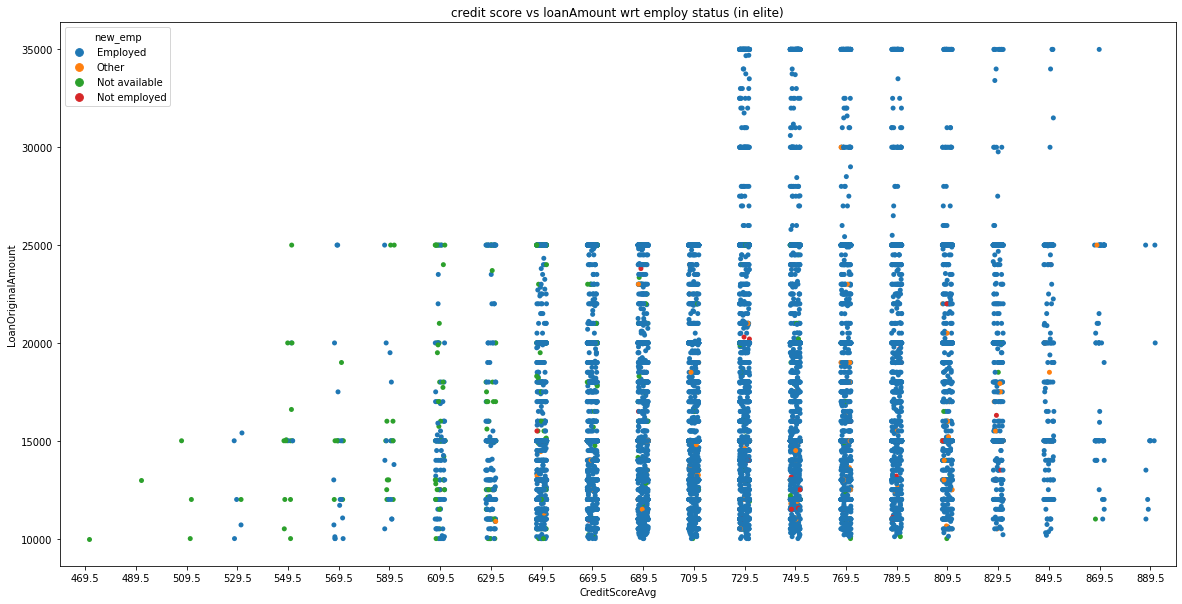

In [33]:
# a stripplot that depicts the relationship between CreditScoreAvg and LoanOriginalAmount with new_emp 
# as the third variable in case of elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.stripplot(data=df.query("LoanOriginalAmount > 10000") , x="CreditScoreAvg" , y="LoanOriginalAmount" , hue = "new_emp" );

plt.title("credit score vs loanAmount wrt employ status (in elite)");

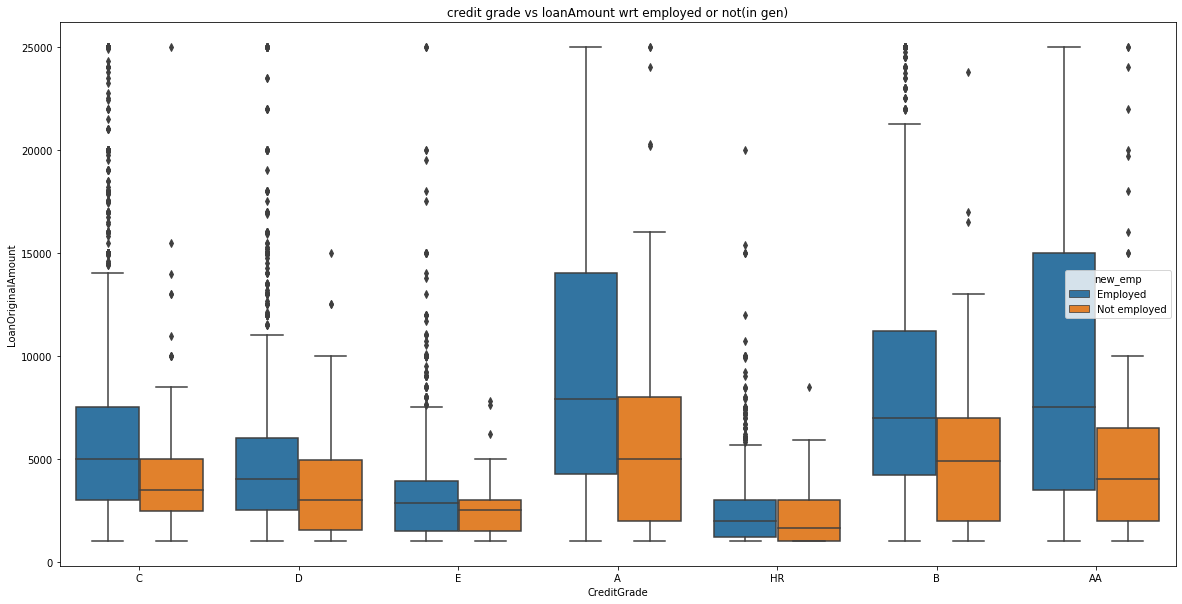

In [34]:
# a boxplot that depicts the relationship between Credit Grade and LoanOriginalAmount with new_emp 
# as the third variable in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.boxplot(data=df.loc[df['new_emp'].isin(['Employed' , 'Not employed'])] , x="CreditGrade" , y="LoanOriginalAmount" , hue = "new_emp" );
plt.title("credit grade vs loanAmount wrt employed or not(in gen)");

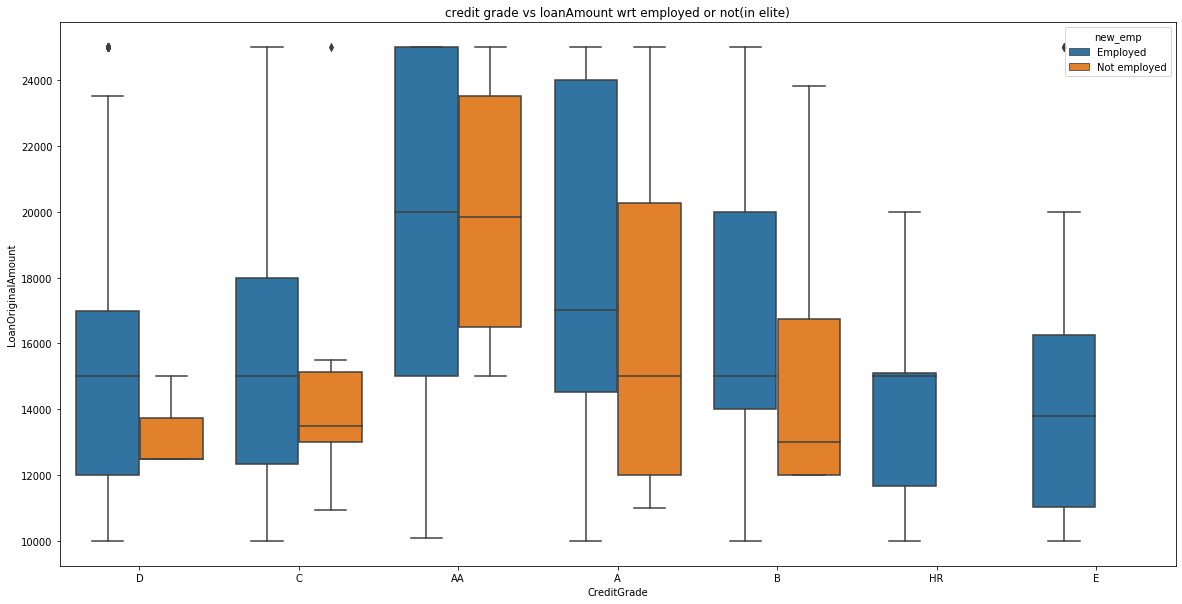

In [35]:
# a boxplot that depicts the relationship between Credit Grade and LoanOriginalAmount with new_emp 
# as the third variable in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.boxplot(data=df.query("LoanOriginalAmount > 10000").loc[df['new_emp'].isin(['Employed' , 'Not employed'])] , x="CreditGrade" , y="LoanOriginalAmount" , hue = "new_emp" );
plt.title("credit grade vs loanAmount wrt employed or not(in elite)");

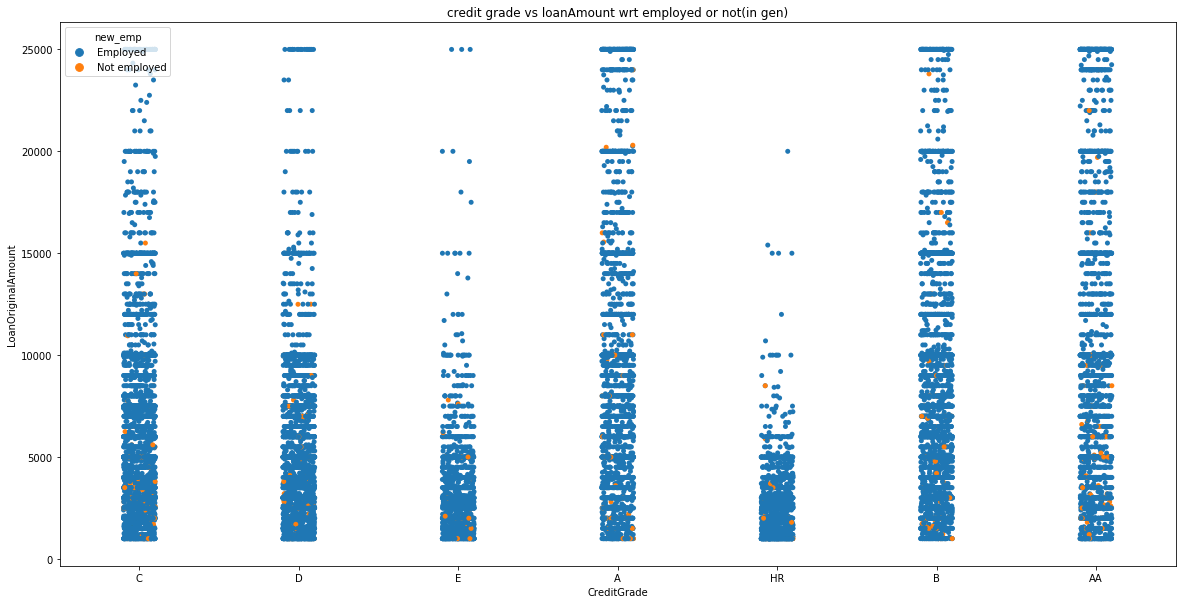

In [36]:
# a stripplot that depicts the relationship between Credit Grade and LoanOriginalAmount with new_emp 
# as the third variable in case of genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.stripplot(data=df.loc[df['new_emp'].isin(['Employed' , 'Not employed'])] , x="CreditGrade" , y="LoanOriginalAmount" , hue = "new_emp" );
plt.title("credit grade vs loanAmount wrt employed or not(in gen)");

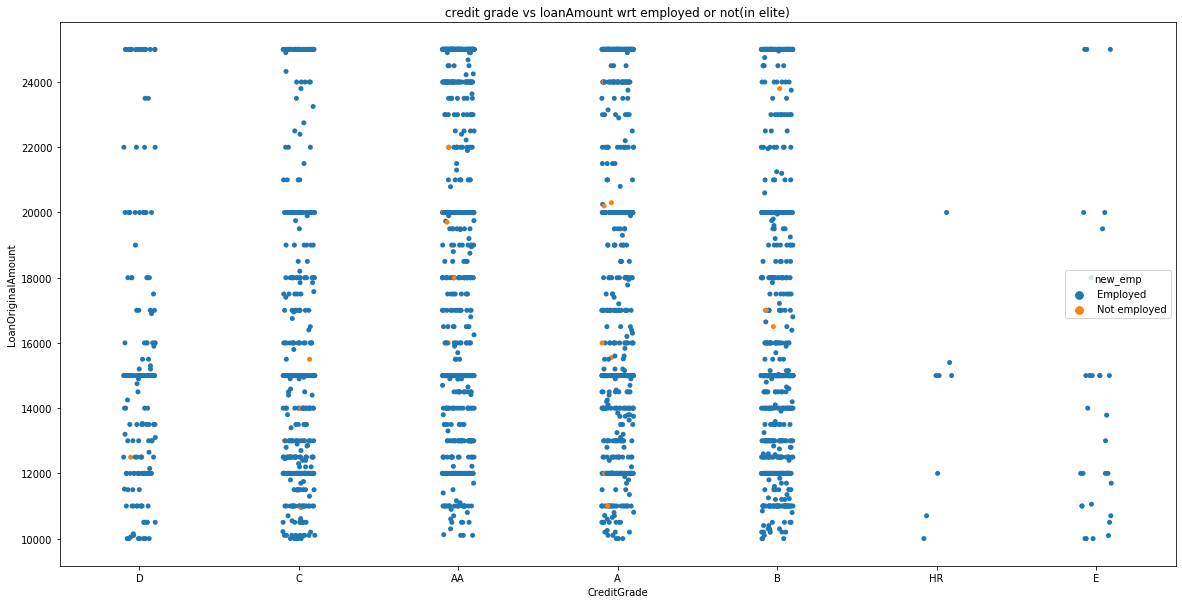

In [37]:
# a stripplot that depicts the relationship between Credit Grade and LoanOriginalAmount with new_emp 
# as the third variable in case of elite loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.stripplot(data=df.query("LoanOriginalAmount > 10000").loc[df['new_emp'].isin(['Employed' , 'Not employed'])] , x="CreditGrade" , y="LoanOriginalAmount" , hue = "new_emp" );
plt.title("credit grade vs loanAmount wrt employed or not(in elite)");

- from the above visualization having **credit score >729.5 and grade  AA , A , B, D , C** will ensure higher chances to get an Elite Loan(loan>10000)

## Finding more relationships

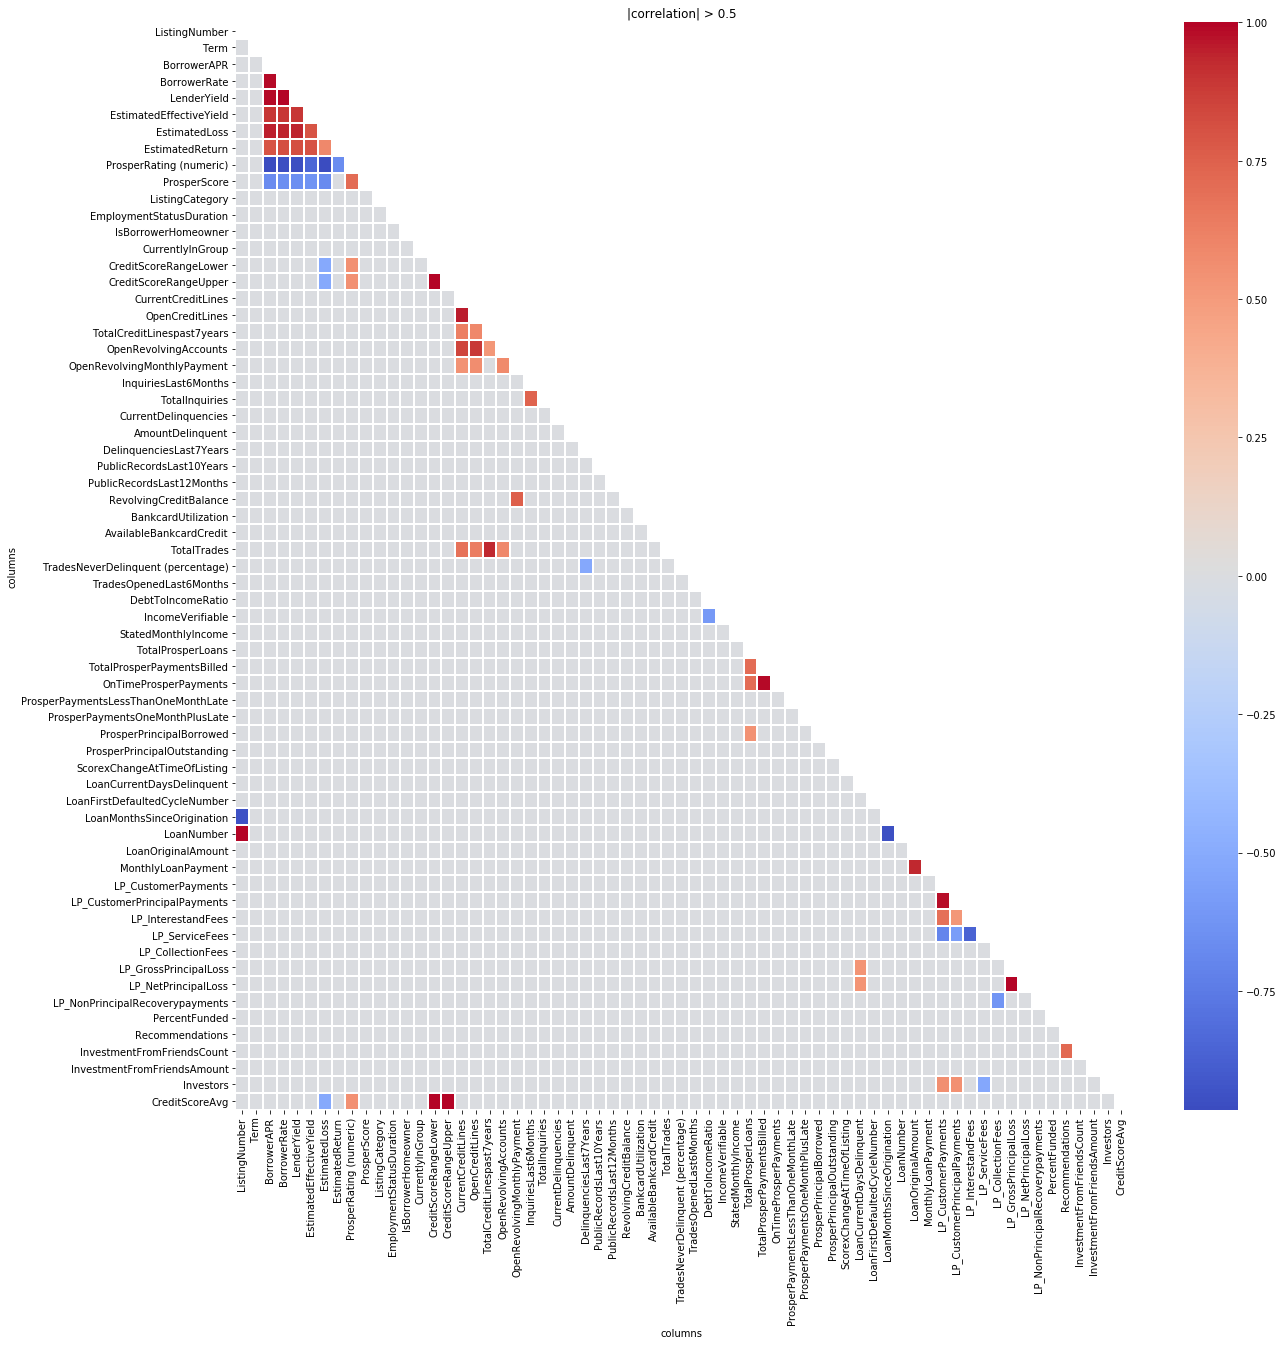

In [38]:
# a heatmap of all the columns with |correlation| > 0.5 to fing relations
fig, ax = plt.subplots(figsize=(20 , 20))
df_corr = df.corr()
df_corr[np.abs(df_corr)<.50] = 0
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr , mask=mask , cmap='coolwarm' , linewidths=1)
plt.xlabel("columns")
plt.ylabel("columns")
plt.title("|correlation| > 0.5");

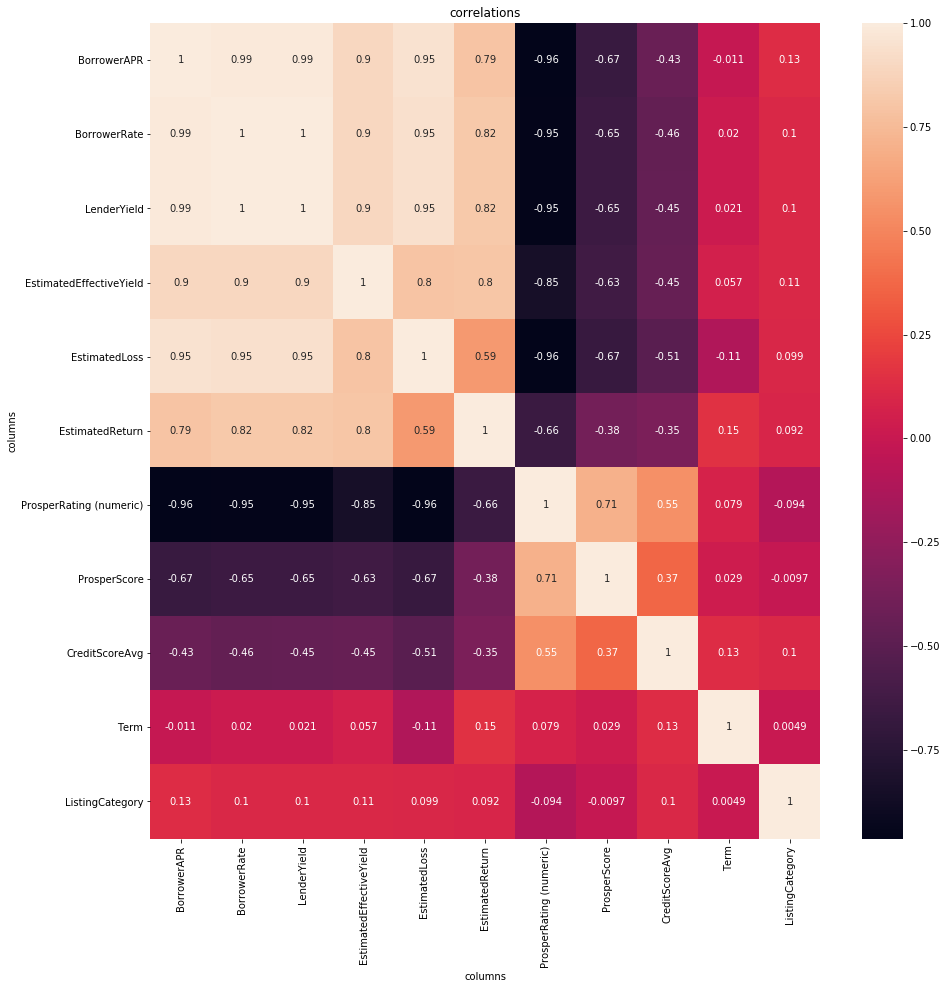

In [39]:
# from the above matrix heatmap we can derive a smaller heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df[['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield','EstimatedLoss' , 'EstimatedReturn' , 'ProsperRating (numeric)' , 'ProsperScore', 'CreditGrade', 'CreditScoreAvg', 'Term','ListingCategory']].corr() , annot=True);
plt.xlabel("columns")
plt.ylabel("columns")
plt.title("correlations");

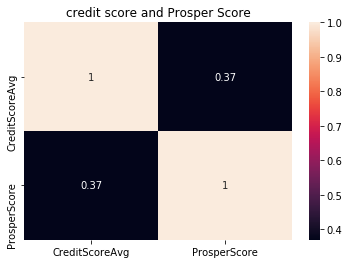

In [40]:
# exploring the relationship between CreditScoreAvg ProsperScore using heatmap
sns.heatmap(df[['CreditScoreAvg' , 'ProsperScore']].corr() , annot=True)
plt.title("credit score and Prosper Score");

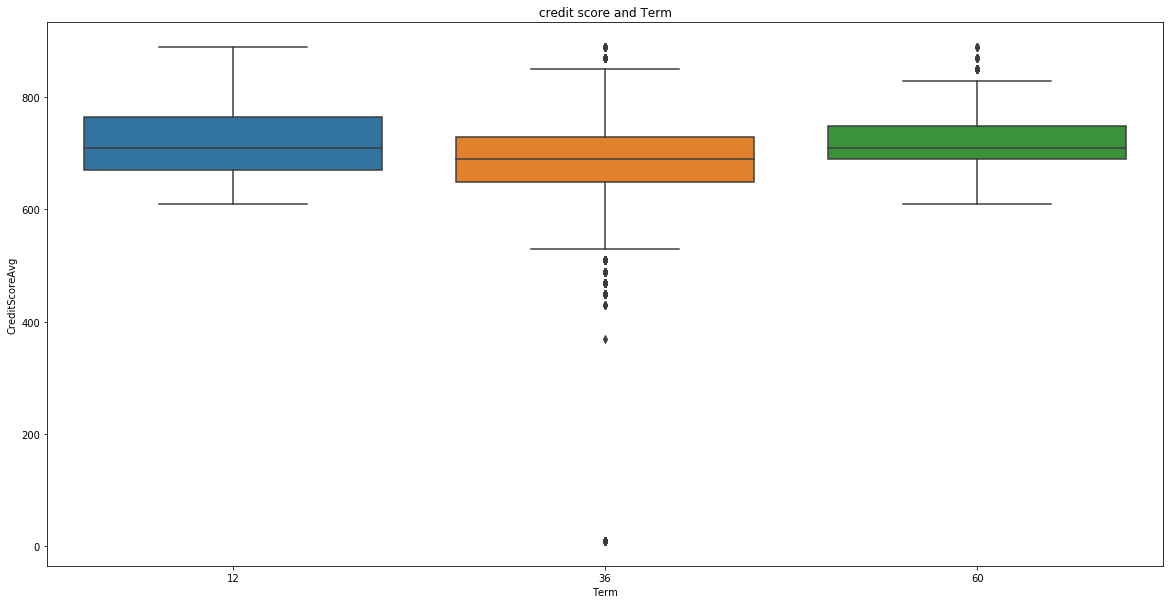

In [41]:
# exploring the relationship between term and Creditscoreavg using boxplot
fig, ax = plt.subplots(figsize=(20 , 10))
sns.boxplot(x ='Term', y ='CreditScoreAvg', data = df,  
              );
plt.title("credit score and Term");

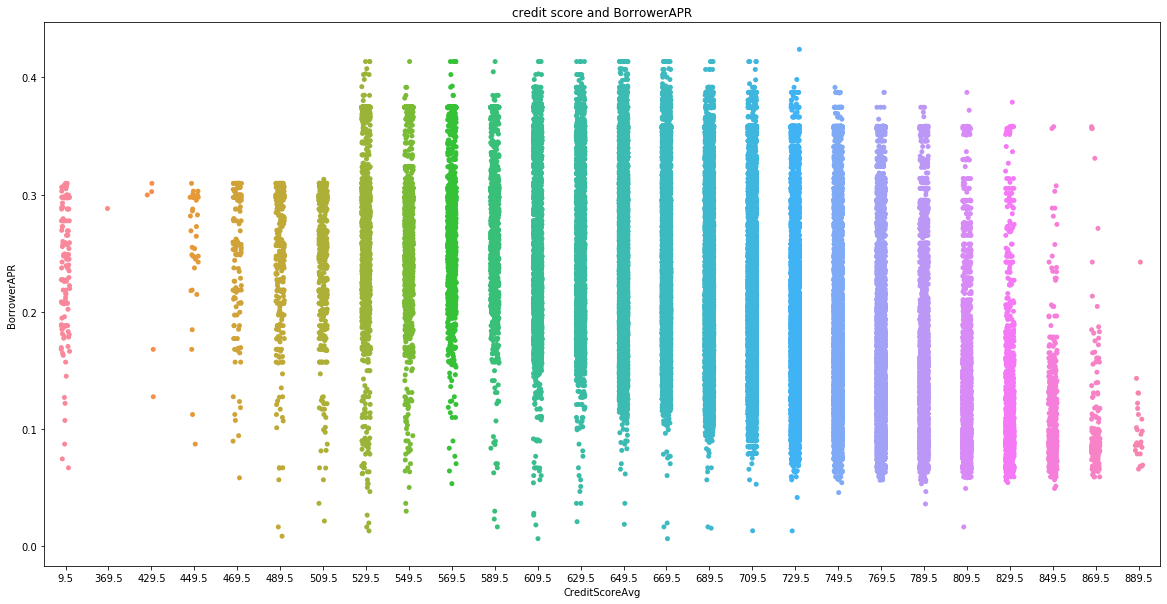

In [42]:
# exploring the relationship between CreditScoreAvg and BorrowerAPR using stripplot
fig, ax = plt.subplots(figsize=(20 , 10))
sns.stripplot(data=df , x="CreditScoreAvg" , y="BorrowerAPR" , jitter = True, dodge = True);
plt.title("credit score and BorrowerAPR");

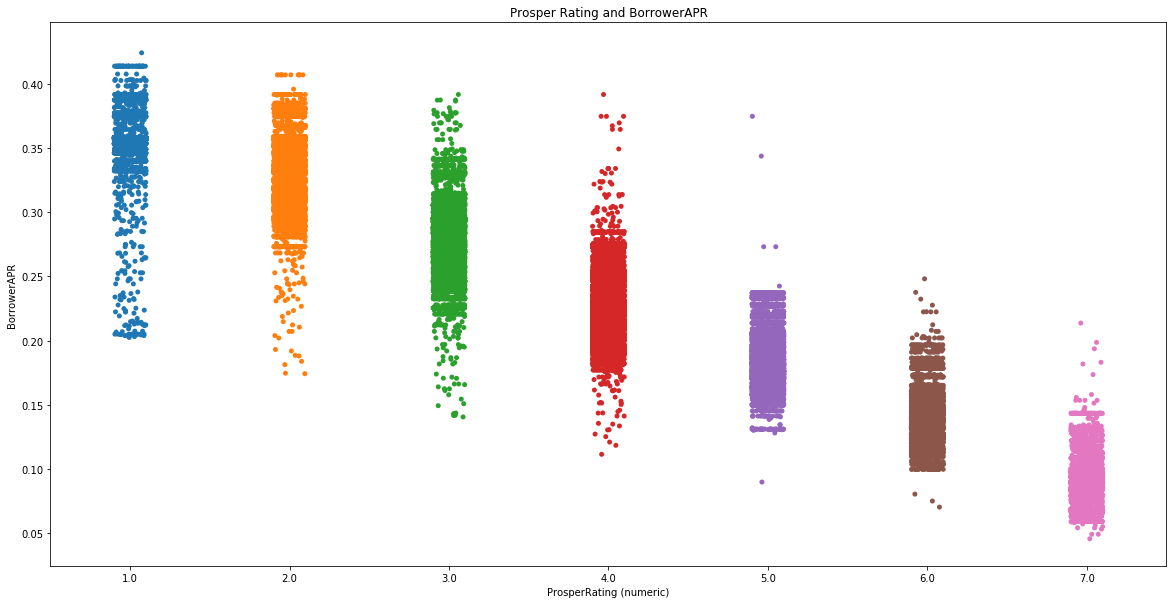

In [43]:
# exploring the relationship between ProsperRating (numeric) and BorrowerAPR using stripplot
fig, ax = plt.subplots(figsize=(20 , 10))
sns.stripplot(x ='ProsperRating (numeric)', y ='BorrowerAPR', data = df,  
              jitter = True, dodge = True);
plt.title("Prosper Rating and BorrowerAPR");

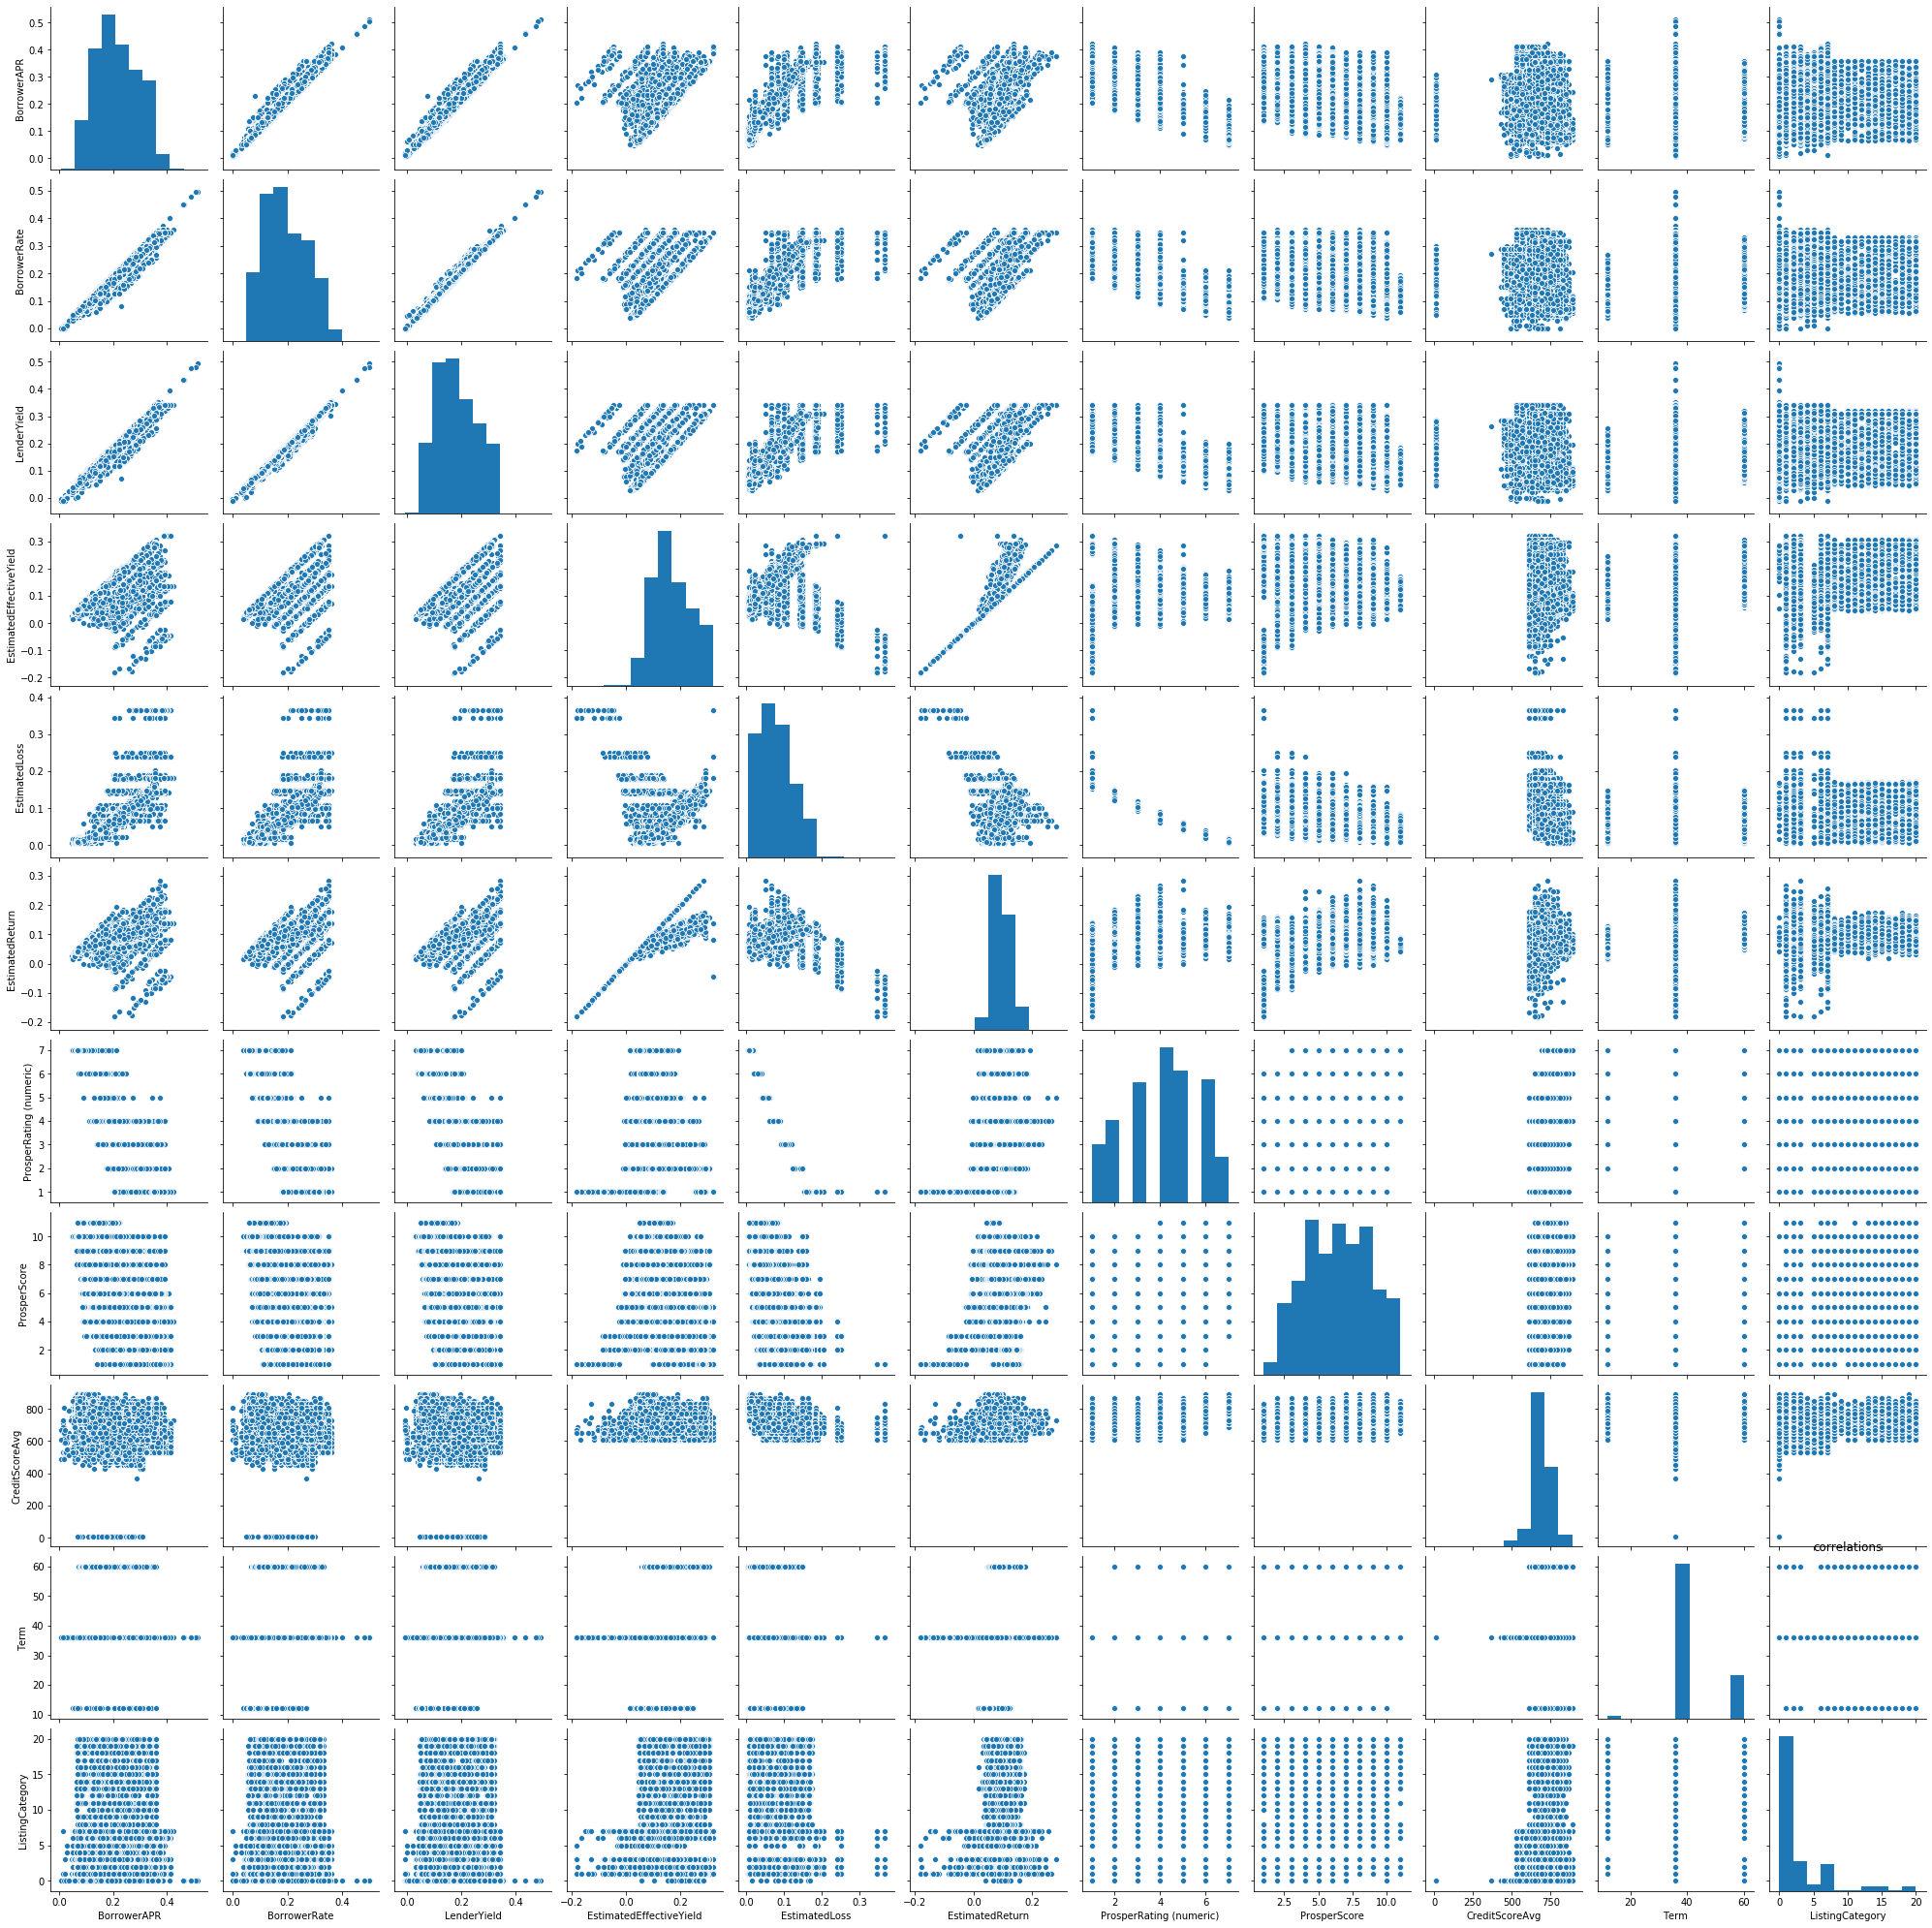

In [44]:
# Plotting Correlationds using scattermatrix 
df_scatter = df[['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield','EstimatedLoss' , 'EstimatedReturn' , 'ProsperRating (numeric)' , 'ProsperScore', 'CreditGrade', 'CreditScoreAvg', 'Term','ListingCategory']]
sns.pairplot(df_scatter)
plt.xlabel("columns")
plt.ylabel("columns")
plt.title("correlations");

From the above visualizations we get to know
- people with higher credit score usually have lower borrowAPR and vice versa
- people with Lower Prosper Rating usually have Higher borrowAPR and vice versa
- Lender Yield is directly proportional to borrowAPR , Borrow Rate and Estimated Effective Yield
- Similarly many other findings are seen from the above scatter matrix

### Finding Relationship for diffrent Loan Status

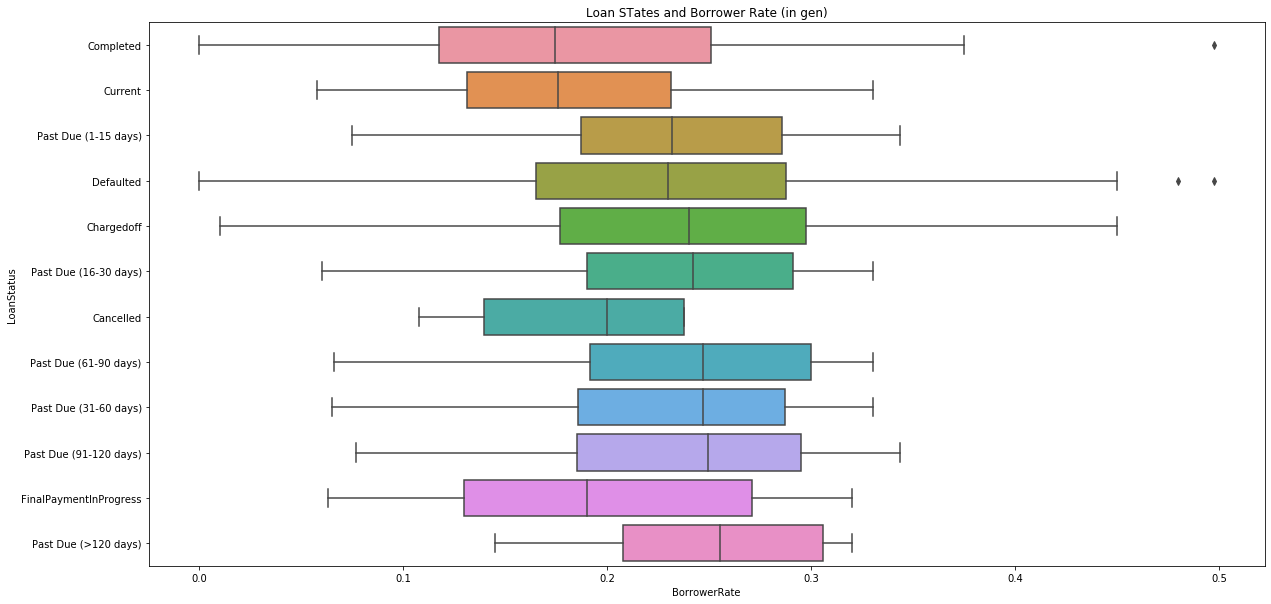

In [45]:
# exploring the relationship between BorrowerRate and LoanStatus using boxplot in genral loans
fig, ax = plt.subplots(figsize=(20 , 10))
sns.boxplot(x ='BorrowerRate', y ='LoanStatus', data = df)
plt.title("Loan STates and Borrower Rate (in gen)");

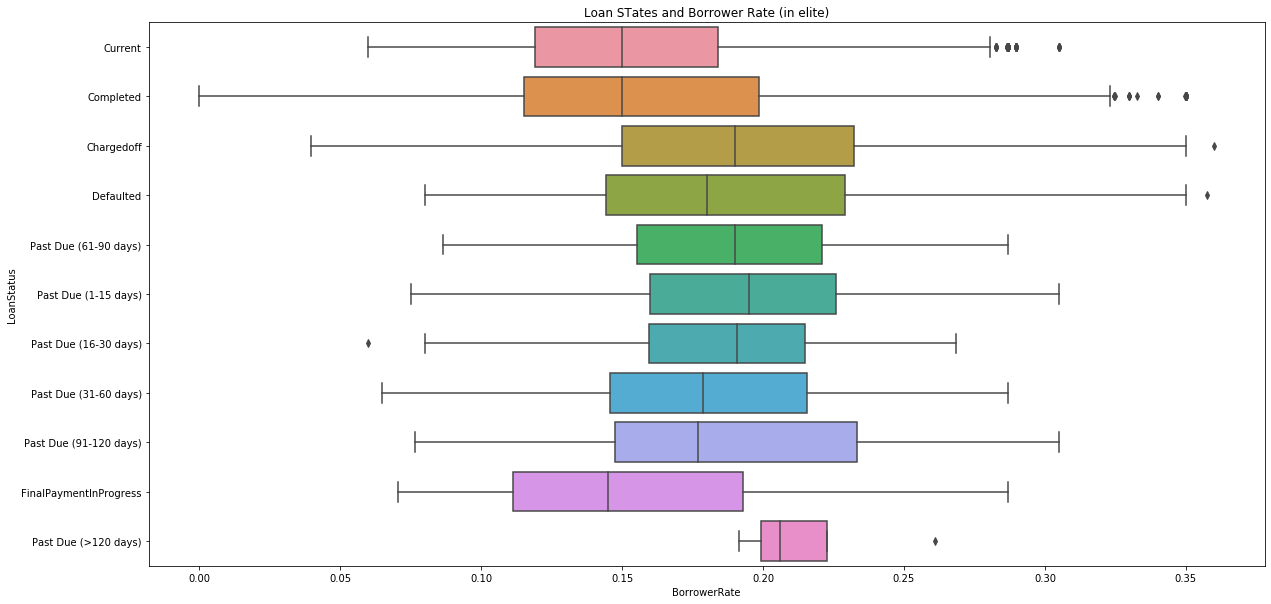

In [46]:
# exploring the relationship between BorrowerRate and LoanStatus using boxplot in elite loan
fig, ax = plt.subplots(figsize=(20 , 10))
sns.boxplot(x ='BorrowerRate', y ='LoanStatus', data = df.query("LoanOriginalAmount > 10000"))
plt.title("Loan STates and Borrower Rate (in elite)");

Text(0.5, 1, 'Loan STates and ProsperRating (in gen)')

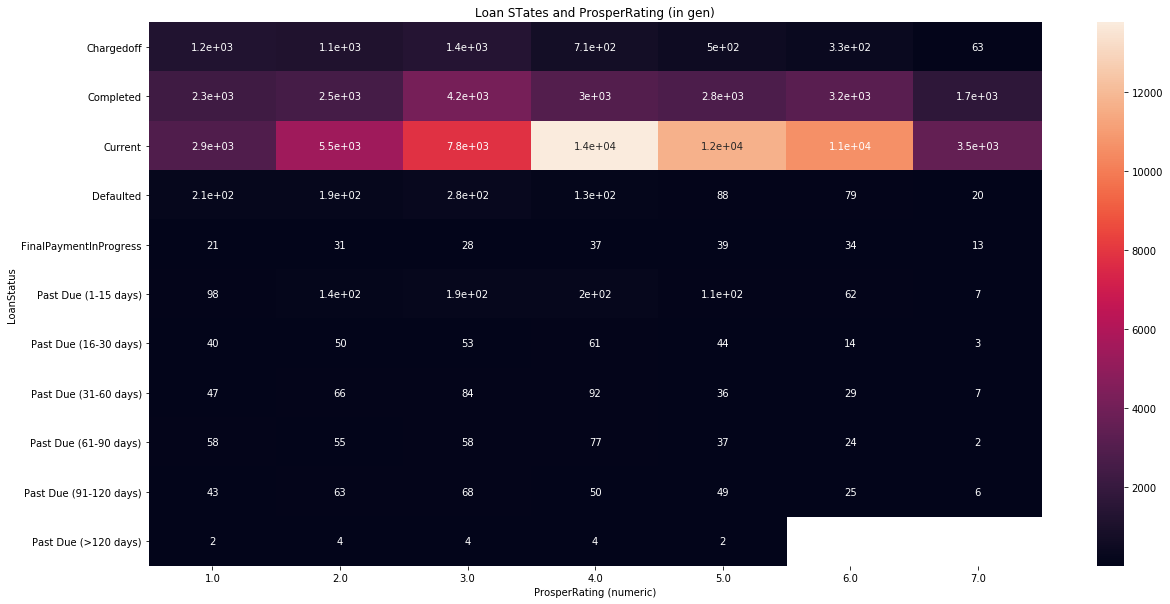

In [47]:
# exploring the relationship between ProsperRating and LoanStatus using heatmap in gen loan
fig, ax = plt.subplots(figsize=(20 , 10))
df_heatmap = df.pivot_table(index='LoanStatus',
                                          columns='ProsperRating (numeric)',
                                          values='ListingKey',
                           aggfunc=lambda x: len(x.unique()))
sns.heatmap(df_heatmap , annot=True)
plt.title("Loan STates and ProsperRating (in gen)")

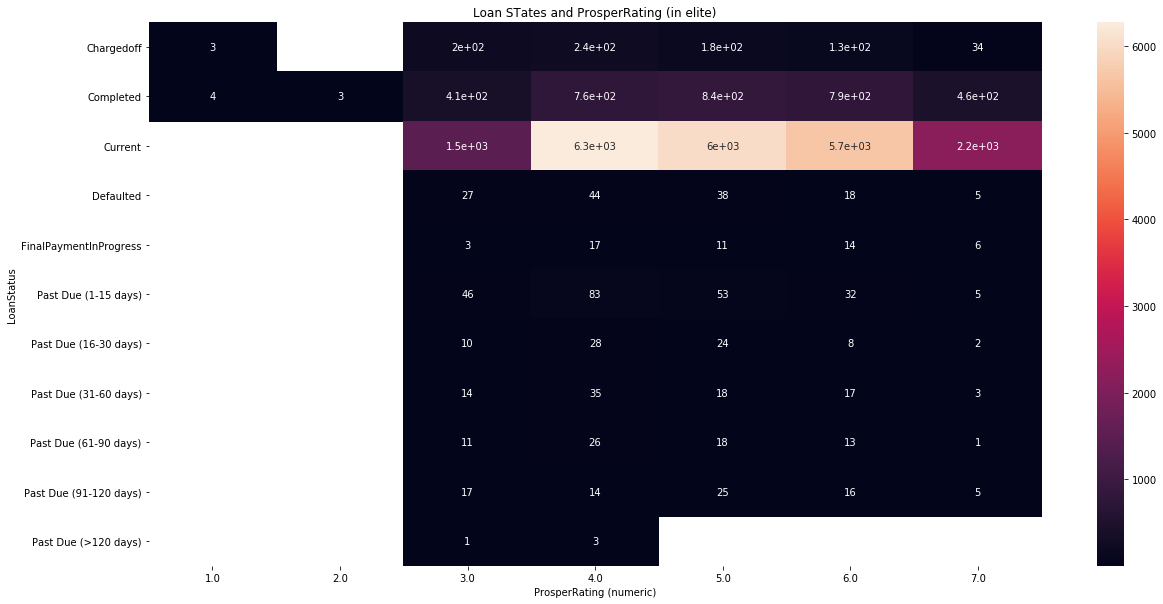

In [48]:
# exploring the relationship between ProsperRating and ListingKey using heatmap in elite loan
fig, ax = plt.subplots(figsize=(20 , 10))
df_heatmap = df.query("LoanOriginalAmount > 10000").pivot_table(index='LoanStatus',
                                          columns='ProsperRating (numeric)',
                                          values='ListingKey',
                           aggfunc=lambda x: len(x.unique()))
sns.heatmap(df_heatmap , annot=True)
plt.title("Loan STates and ProsperRating (in elite)");

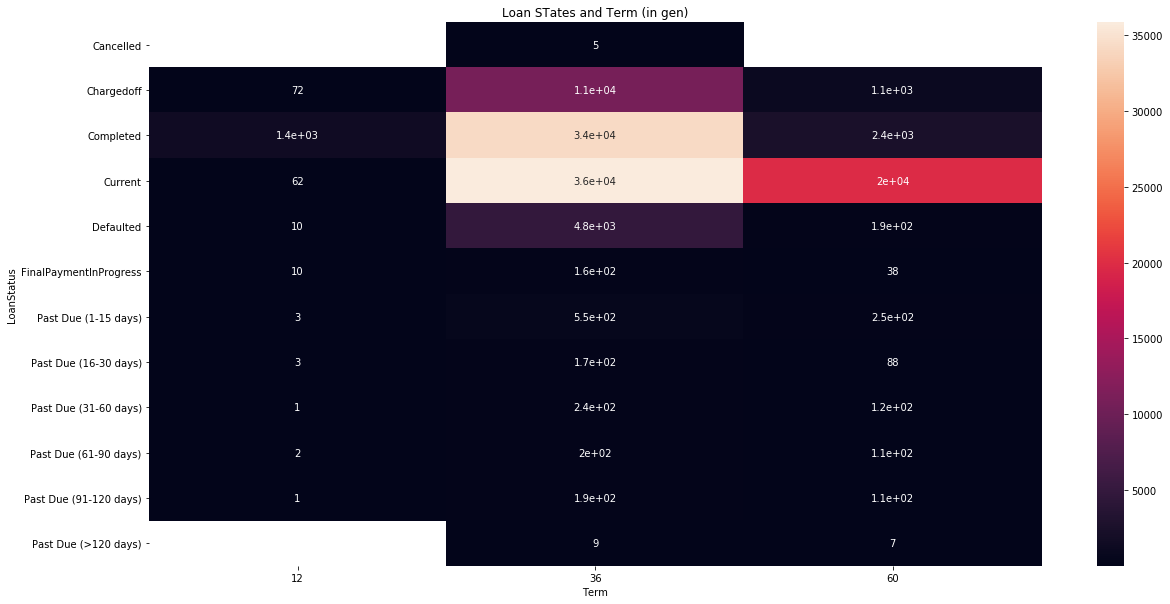

In [49]:
# exploring the relationship between LoanStatus and Term using heatmap in genral loan
fig, ax = plt.subplots(figsize=(20 , 10))
df_heatmap = df.pivot_table(index='LoanStatus',
                                          columns='Term',
                                          values='ListingKey',
                           aggfunc=lambda x: len(x.unique()))
sns.heatmap(df_heatmap , annot=True)
plt.title("Loan STates and Term (in gen)");

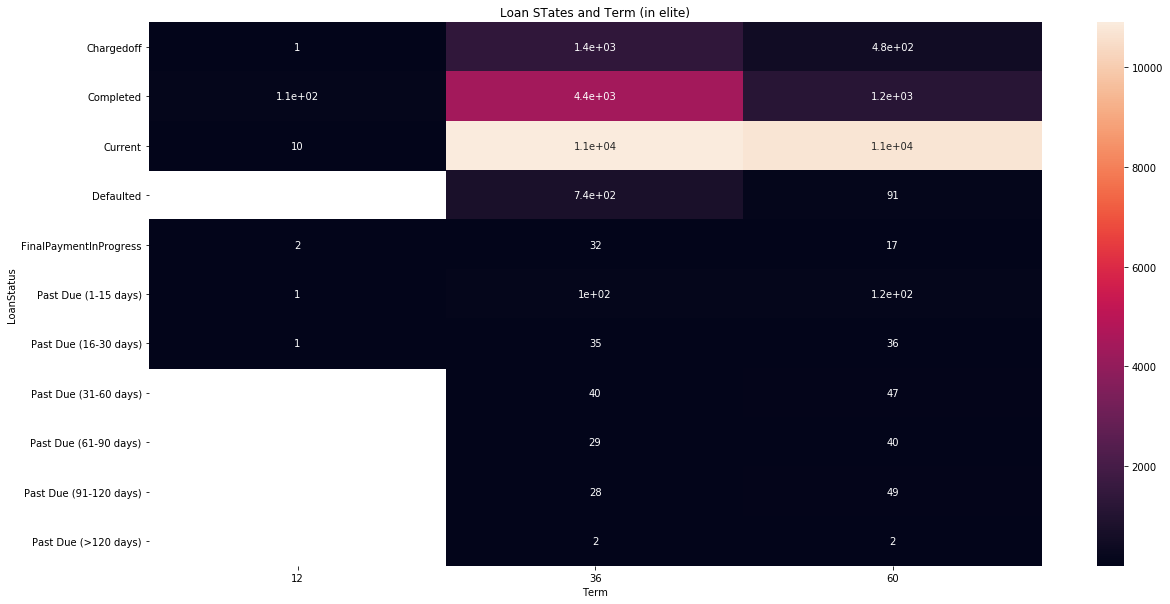

In [50]:
# exploring the relationship between LoanStatus and Term using heatmap in elite loan
fig, ax = plt.subplots(figsize=(20 , 10))
df_heatmap = df.query("LoanOriginalAmount > 10000").pivot_table(index='LoanStatus',
                                          columns='Term',
                                          values='ListingKey',
                           aggfunc=lambda x: len(x.unique()))
sns.heatmap(df_heatmap , annot=True)
plt.title("Loan STates and Term (in elite)");

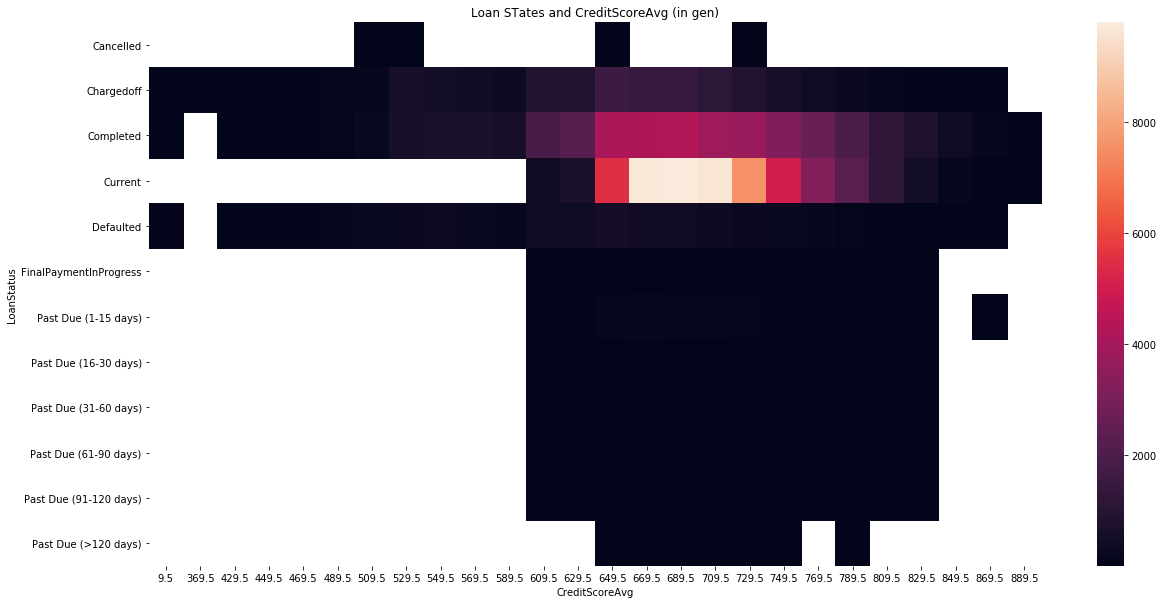

In [51]:
# exploring the relationship between LoanStatus and CreditScoreAvg using heatmap in genral loan
fig, ax = plt.subplots(figsize=(20 , 10))
df_heatmap = df.pivot_table(index='LoanStatus',
                                          columns='CreditScoreAvg',
                                          values='ListingKey',
                           aggfunc=lambda x: len(x.unique()))
sns.heatmap(df_heatmap )
plt.title("Loan STates and CreditScoreAvg (in gen)");

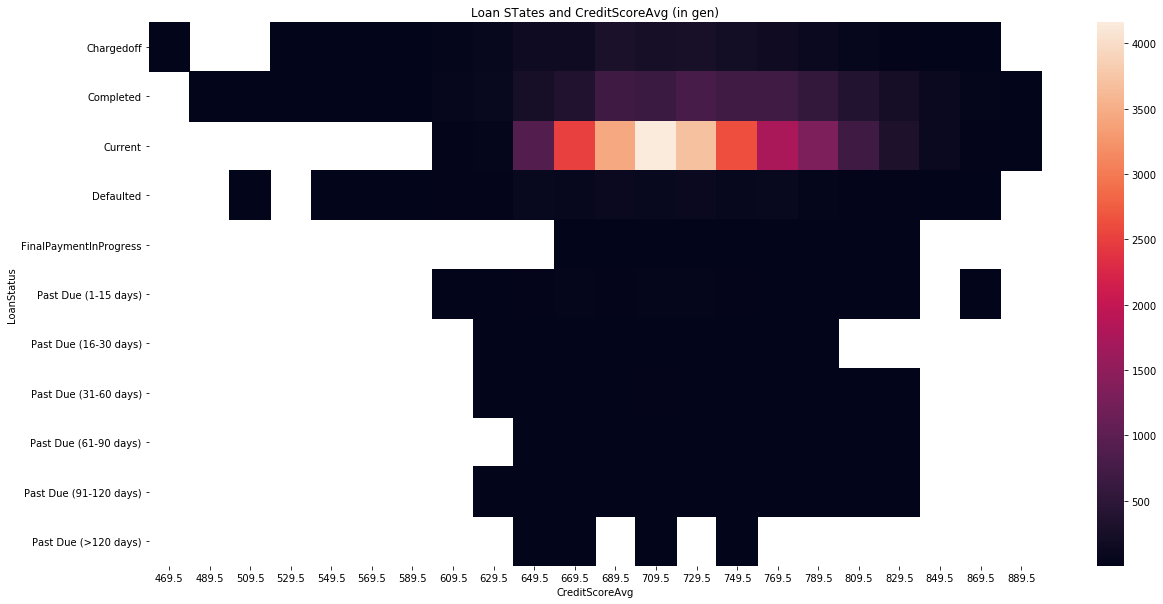

In [52]:
# exploring the relationship between LoanStatus and CreditScoreAvg using heatmap in elite loan
fig, ax = plt.subplots(figsize=(20 , 10))
df_heatmap = df.query("LoanOriginalAmount > 10000").pivot_table(index='LoanStatus',
                                          columns='CreditScoreAvg',
                                          values='ListingKey',
                           aggfunc=lambda x: len(x.unique()))
sns.heatmap(df_heatmap )
plt.title("Loan STates and CreditScoreAvg (in gen)");

From the above visualizations we get to know-
- Borrow rates for all the loan statuses were lower for elite oans(loan>10000) compared to the average of all the loans
- elite loans tend to have terms 36 or 60 while on an average most loans have terms between 12-36
- similarly for Prosper Ratings elite loans have prosper ratings > 4
- elite loans have no cancellations and less delayed on an average

## Loan Amounts recieved for diffrent Loan purposes

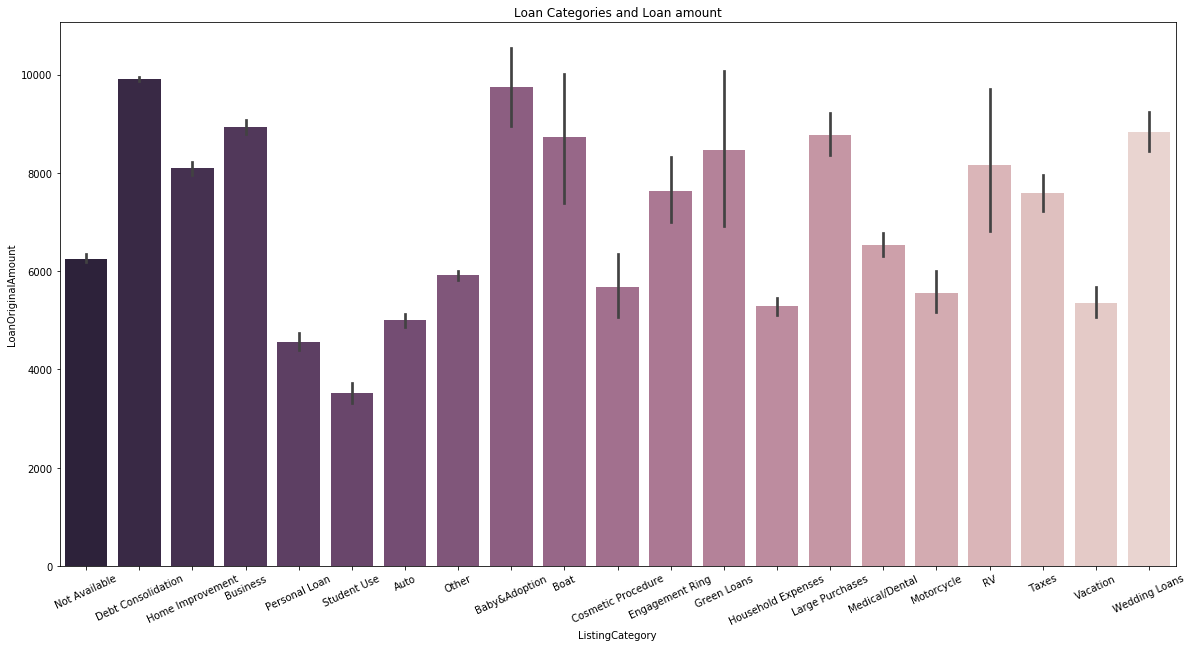

In [53]:
# exploring the relationship between ListingCategory and LoanOriginalAmount using barplot in genral loan
new = ["Not Available" , "Debt Consolidation", "Home Improvement" , "Business" , "Personal Loan" , "Student Use" , "Auto" , "Other" , "Baby&Adoption",
      "Boat" , "Cosmetic Procedure" , "Engagement Ring" , "Green Loans" , "Household Expenses" , "Large Purchases" , "Medical/Dental" , "Motorcycle" ,
      "RV" , "Taxes" , "Vacation" , "Wedding Loans"]
fig, ax = plt.subplots(figsize=(20 , 10))
cmap = sns.cubehelix_palette(21 , reverse=True)
sns.barplot(data=df , x="ListingCategory" , y="LoanOriginalAmount"  ,palette=cmap )
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(21):
    labels[i] = new[int(labels[i])]
ax.set_xticklabels(labels)
plt.xticks(rotation=25);
plt.title("Loan Categories and Loan amount");

- on an average the Loan amount for debt consolidation was th highest and lowest for student use

# Observations:
- Forr all the loans in genral Most of the people have completed their payment fo the loan however a significant proportion still is defaulted or is past due by 1-120 days
- However in the case of Elite Loans(loans>10000) the completion rate is very low as compared to all the loans in genral
- we see that most of the loans given out were to cover off other debts i.e. Debt Consolidation in both the cases Normal loans in. genal and Elite Loans(loan>10000)
- Least loans were given to boats , green Loans and RV in case of genral Loans
- While in case of Elite Loans the least no of loans were given to Student Use , Rv and Cosmetic Procedure
- On an Average most no of Loans were taken by Computer Programmers followed by Executive and then teacher 
- While in the case of Elite Loans (loans >10000) most loans were taken by Executive Followed by computer programmer and then analyst
- On an Average least no of Loans were taken by Police Officer , civil Servise ,  Engineer mechanical
- While in the case of Elite Loans (loans >10000) least loans were taken by truck driver , sales-retail , Engineer-Electrical
- in case of all the loans taken into acount people with credit grade of **C , D , B** were gven more preference while people with credit grade of **NC** were less
- while in case of Elite loans(loans>10000) loans people with credit grade of **B , AA , A** were gven more preference while people with credit grade of **HR** were less
- People who were **employed** were given more preference both in normal and Elite loans(loans>10000) while they also are the once to ask for loans the most
- most of the loans issued was between 1000-7000 range
- We see that most of the people considering all the loans have their Prosper Score between 4-9
- while those who recieved Elite Loans(loan>10000) has their Prosper Score between 6-9
- BorrowerAPR BorrowerRate are linearly related
- In the case of normal ie all the loans in genral 36 monts term has usally the highest borrow rate 
- While in the case of elite loans(loan>10000) 60 months term had usually the highest borrow rate
- with the increase of term usually the borrow rate can be expected to rise
- with the increse in prosper score loan amount also increased drastially
- having **credit score >729.5 and grade  AA , A , B, D , C** will ensure higher chances to get an Elite Loan(loan>10000)
- people with higher credit score usually have lower borrowAPR and vice versa
- people with Lower Prosper Rating usually have Higher borrowAPR and vice versa
- Lender Yield is directly proportional to borrowAPR , Borrow Rate and Estimated Effective Yield
- Similarly many other findings are seen from the above scatter matrix
- Borrow rates for all the loan statuses were lower for elite oans(loan>10000) compared to the average of all the loans
- elite loans tend to have terms 36 or 60 while on an average most loans have terms between 12-36
- similarly for Prosper Ratings elite loans have prosper ratings > 4
- elite loans have no cancellations and less delayed on an average
- on an average the Loan amount for debt consolidation was th highest and lowest for student use

## Key Insights for Presentation

> - Having **credit score >729.5 , grade  AA , A , B, D , C and Prosper Score in between (6-9)** and having a job of **Executive Followed by computer programmer** demanding a loan for **Debt Consolidation** will ensure higher chances to get an Elite Loan(loan>10000).
> - Lender Yield is directly proportional to borrowAPR , Borrow Rate and Estimated Effective Yield